In [1]:
import numpy as np

In [2]:
from IPython.core.display import display, HTML

display(HTML("<style>.container { width:100% !important; }</style>"))


/tmp/ipykernel_578061/1877911641.py:1: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


In [3]:
flows = np.load('../data/flows.npy')

In [4]:
import pandas as pd
regions = pd.read_csv('/home/yangxiaojie/KDD2025/poi/FEA_hyoujun.csv')

def nan_to_empty_str(value):
    if pd.isna(value):
        return ''
    return str(value)


code2region = dict()
for i, row in regions.iterrows():
    code2region[str(row['標準地域コード']).zfill(5)] = row['都道府県'] + nan_to_empty_str(row['政令市･郡･支庁･振興局等']) + nan_to_empty_str(row['市区町村'])

In [5]:
region2code = dict(zip(list(code2region.values()), list(code2region.keys())))

In [6]:
import pickle as pk

with open('/home/yangxiaojie/KDD2025/selected_mesh.pk', 'rb') as f:
    selected_mesh = pk.load(f)

assert len(set(selected_mesh.values())) == 490

idx2code = dict(zip(list(range(490)), sorted(set(selected_mesh.values()))))

In [7]:
code2idx = dict(zip(list(idx2code.values()), list(idx2code.keys())))

In [8]:
[code2region[k] for k in code2idx.keys()]

['北海道札幌市中央区',
 '北海道札幌市北区',
 '北海道札幌市東区',
 '北海道札幌市白石区',
 '北海道札幌市豊平区',
 '北海道札幌市南区',
 '北海道札幌市西区',
 '北海道札幌市厚別区',
 '北海道札幌市手稲区',
 '北海道札幌市清田区',
 '北海道函館市',
 '北海道小樽市',
 '北海道旭川市',
 '北海道室蘭市',
 '北海道釧路市',
 '北海道帯広市',
 '北海道北見市',
 '北海道岩見沢市',
 '北海道苫小牧市',
 '北海道江別市',
 '北海道千歳市',
 '北海道北広島市',
 '青森県青森市',
 '青森県弘前市',
 '青森県八戸市',
 '岩手県盛岡市',
 '岩手県花巻市',
 '岩手県北上市',
 '岩手県一関市',
 '岩手県奥州市',
 '宮城県仙台市青葉区',
 '宮城県仙台市宮城野区',
 '宮城県仙台市若林区',
 '宮城県仙台市太白区',
 '宮城県仙台市泉区',
 '宮城県石巻市',
 '宮城県名取市',
 '宮城県多賀城市',
 '宮城県大崎市',
 '秋田県秋田市',
 '山形県山形市',
 '山形県鶴岡市',
 '山形県酒田市',
 '山形県天童市',
 '福島県福島市',
 '福島県会津若松市',
 '福島県郡山市',
 '福島県いわき市',
 '茨城県水戸市',
 '茨城県日立市',
 '茨城県土浦市',
 '茨城県古河市',
 '茨城県取手市',
 '茨城県つくば市',
 '茨城県ひたちなか市',
 '茨城県筑西市',
 '茨城県つくばみらい市',
 '栃木県宇都宮市',
 '栃木県足利市',
 '栃木県栃木市',
 '栃木県佐野市',
 '栃木県鹿沼市',
 '栃木県小山市',
 '栃木県那須塩原市',
 '群馬県前橋市',
 '群馬県高崎市',
 '群馬県桐生市',
 '群馬県伊勢崎市',
 '群馬県太田市',
 '群馬県館林市',
 '群馬県渋川市',
 '群馬県藤岡市',
 '群馬県安中市',
 '群馬県みどり市',
 '埼玉県さいたま市北区',
 '埼玉県さいたま市大宮区',
 '埼玉県さいたま市見沼区',
 '埼玉県さいたま市中央区',
 '埼玉県さいたま市桜区',
 '埼玉県さいたま市浦和区',
 '埼玉県さいたま市南区',
 '埼玉県さいたま市緑区',
 

In [9]:
from datetime import datetime, timedelta
start_timestamp = '2023-04-01 00:00:00'
start_time = datetime.strptime(start_timestamp, '%Y-%m-%d %H:%M:%S')

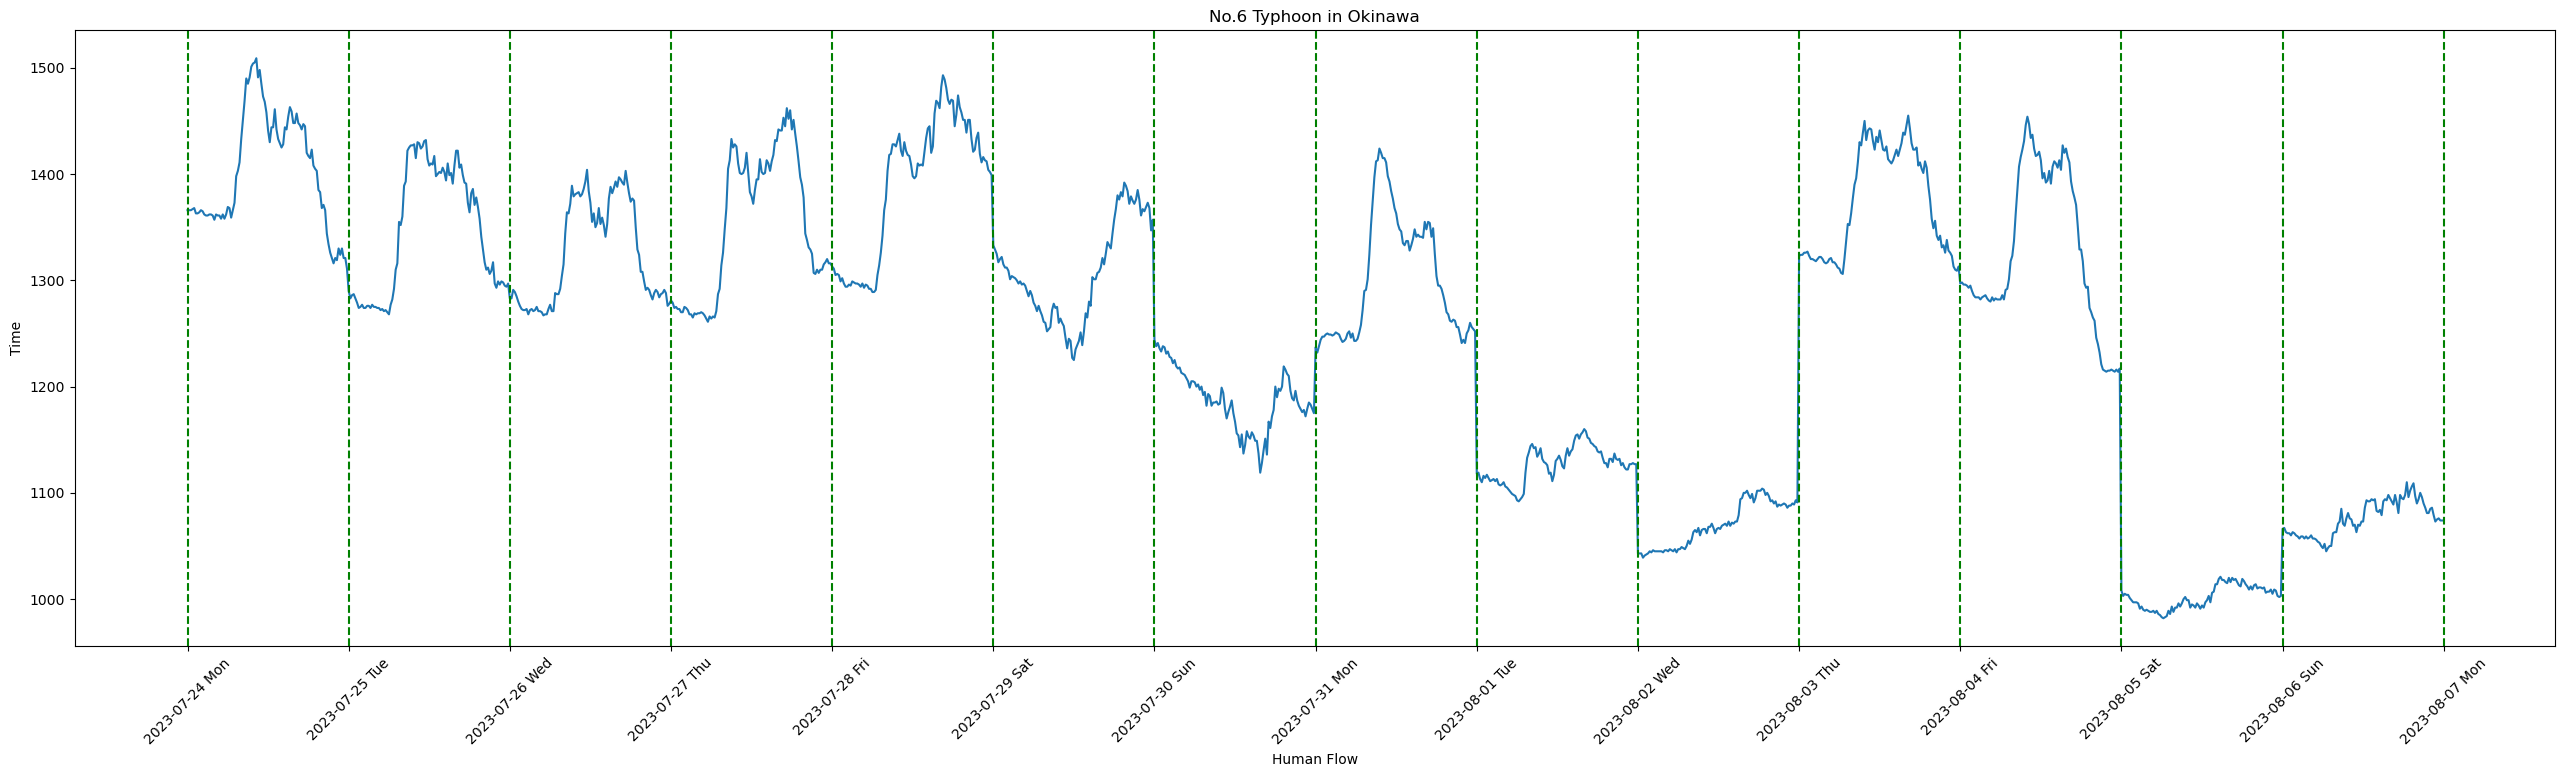

NameError: name 'news' is not defined

In [10]:
target_date = '2023-07-31 00:00:00'
target_time = datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S')

target_day = (target_time - start_time).days

target_region = '沖縄県那覇市'
idx = code2idx[region2code[target_region]]

x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(-7, 7)]

import matplotlib.pyplot as plt

# 示例数据
data = [i for day_flow in flows[target_day-7:target_day+7, :,idx] for i in day_flow.tolist()]

# 创建一个新的图形
plt.figure(figsize=(32, 8))

# 绘制折线图
plt.plot(data)

# 添加标题和标签
plt.title('No.6 Typhoon in Okinawa')
plt.xlabel('Human Flow')
plt.ylabel('Time')

#plt.axvline(x=6 * 96 + 16 * 4, color='r', linestyle='--')
for i in range(15):
    plt.axvline(x=i * 96, color='green', linestyle='--')

x_positions = [i * 96 for i in range(15)]
x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') + ' ' + (datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%a') for i in range(-7, 8)]
plt.xticks(ticks=x_positions, labels=x_labels, rotation=45)    

# 显示图形
plt.show()

x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(-7, 7)]
filtered_news = news[
    (news['DateAndTime'] >= pd.to_datetime(x_labels[0])) & 
    (news['DateAndTime'] <= pd.to_datetime(x_labels[-1])) &
    (news['codes'].str.contains(region2code[target_region]))
]
filtered_news.sort_values(by='DateAndTime')

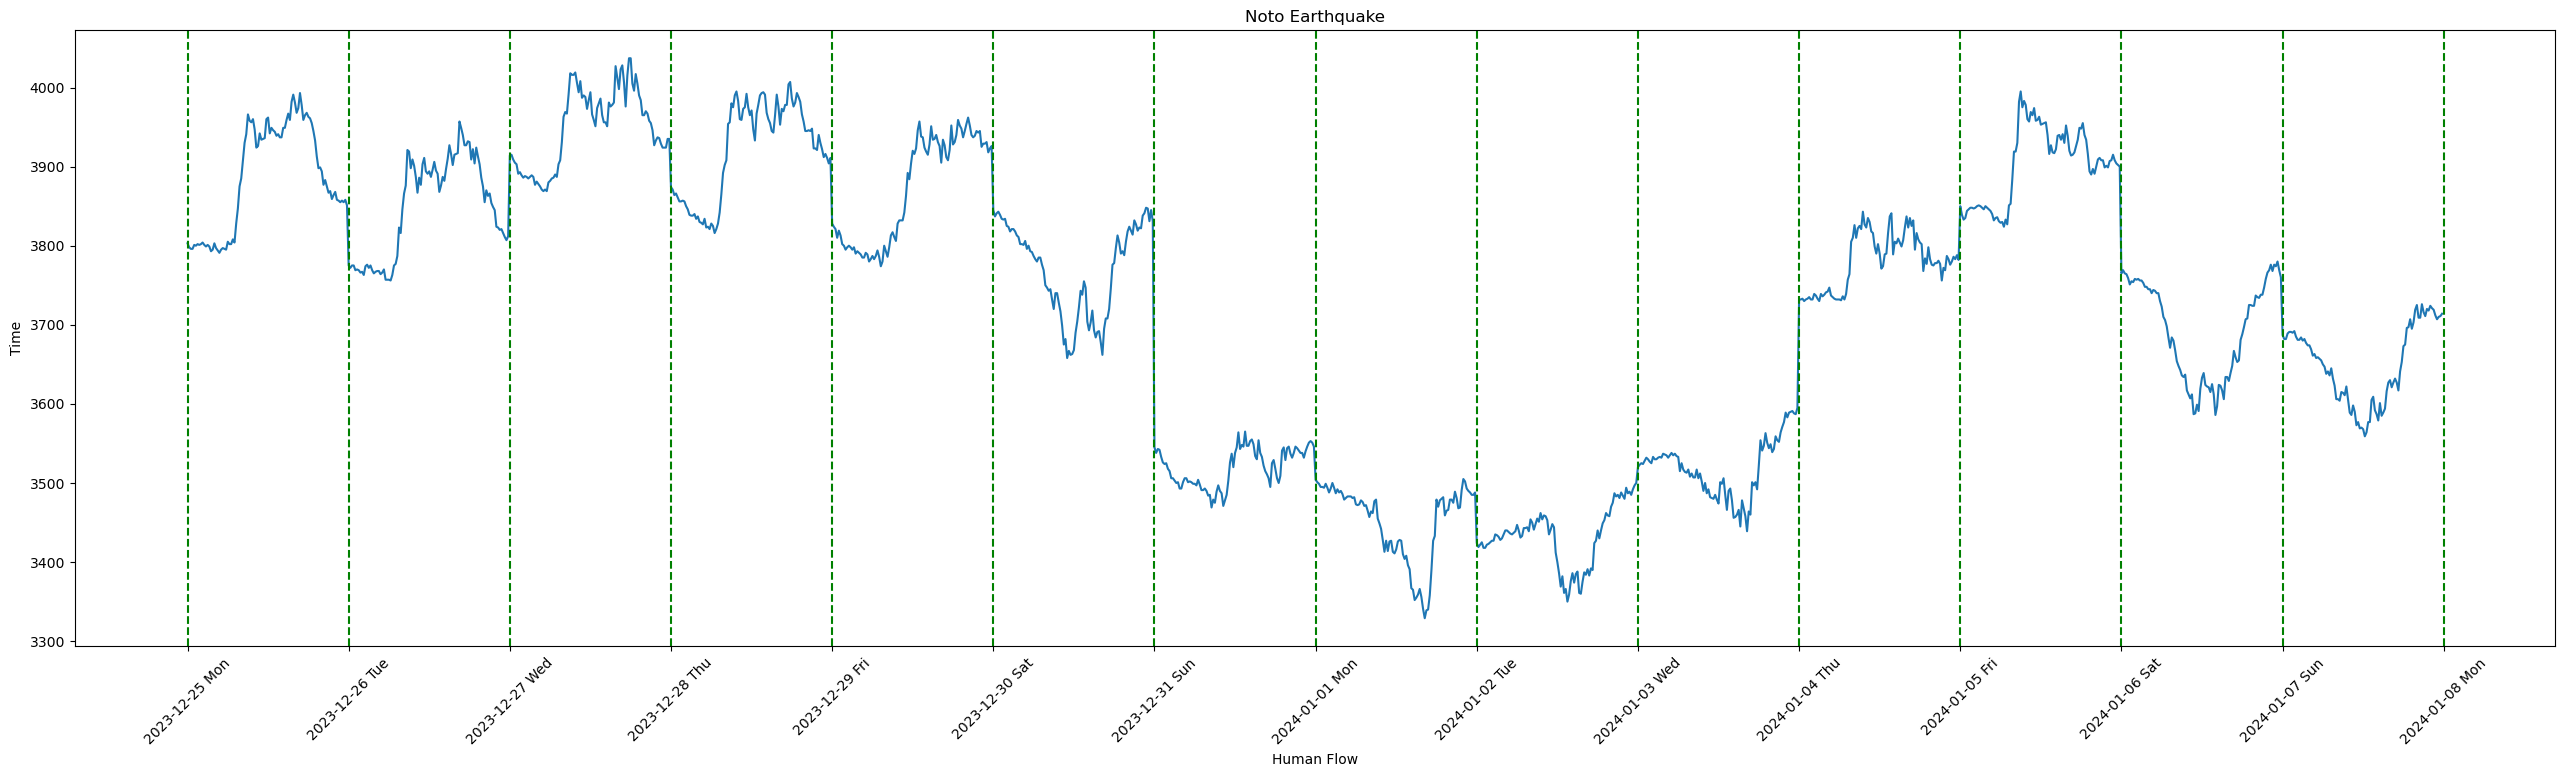

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
25944,2023-12-25 03:00:00,"スポーツ, 災害・事故",相撲,日本,記事,3,"石川県, 鹿児島県, 青森県, 大阪府",初場所番付メモ,▽三役琴ノ若は７場所連続、大栄翔は６場所連続。▽宇良木瀬部屋からの新小結は１４年秋場所の常幸...,"['17201', '17202', '17203', '17204', '17205', ...",205,"[0, 0, 0, 70, 0, 0, 0, 0, 30, 60]"
25976,2023-12-25 15:38:14,"犯罪・司法, 健康",社会,日本,記事,3,"富山県富山市, 富山県, 石川県, 石川県金沢市, 福井県, 福井県福井市",Ｂ型肝炎訴訟で４人和解 富山地裁,集団予防接種での注射器使い回しが原因でＢ型肝炎を発症したとして、国に損害賠償を求めた富山地裁...,"['16201', '17201', '18201']",3,"[0, 0, 0, 80, 0, 0, 0, 0, 0, 10]"
25977,2023-12-25 16:21:40,気象,社会,日本,番外,2,"石川県, 石川県輪島市, 石川県金沢市",番外２９ 石川県輪島市の集落孤立解消,石川県輪島市によると、２２日からの大雪で倒木が道路をふさぐなどしたため続いていた集落の孤立が...,"['17204', '17201']",2,"[0, 20, 0, 80, 0, 0, 0, 0, 0, 40]"
25981,2023-12-25 16:49:02,気象,社会,日本,記事,3,"石川県, 石川県金沢市, 石川県輪島市, 石川県珠洲市, 石川県鳳珠郡能登町",石川・輪島の集落孤立解消 大雪で一時１７６世帯,石川県輪島市は２５日、大雪の影響で倒木が道路をふさぐなどしていたために起きていた集落の孤立が...,"['17201', '17204', '17205', '17463']",4,"[0, 0, 0, 80, 0, 20, 0, 0, 10, 50]"
25988,2023-12-25 18:12:27,気象,社会,日本,記事,3,"石川県, 石川県金沢市, 石川県輪島市, 石川県珠洲市, 石川県鳳珠郡能登町",石川・輪島の集落孤立解消 大雪で一時１７６世帯,石川県輪島市は２５日、大雪の影響で倒木が道路をふさぐなどしていたために起きていた集落の孤立が...,"['17201', '17204', '17205', '17463']",4,"[0, 5, 0, 60, 10, 20, 0, 0, 0, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...
27060,2024-01-06 22:30:54,"災害・事故, 犯罪・司法, 健康, 気象",社会,日本,記事,3,"石川県, 富山県, 福井県, 熊本県, 新潟県, 岐阜県, 新潟県新潟市, 富山県富山市, ...",１２４時間後９０代女性救出 石川・珠洲、倒壊住宅から 病院搬送、快方に,石川県の能登半島地震で６日夜、同県珠洲市正院町の住宅から倒壊した住宅から９０代女性が救出され...,"['43101', '43102', '43103', '43104', '43105', ...",107,"[0, 0, 10, 90, 0, 0, 50, 30, 20, 80]"
27061,2024-01-06 22:49:16,"災害・事故, 犯罪・司法, 健康, 気象",社会,日本,記事,3,"石川県, 富山県, 福井県, 熊本県, 新潟県, 岐阜県, 新潟県新潟市, 富山県富山市, ...",１２４時間後９０代女性救出 石川・珠洲、倒壊住宅から 病院搬送、快方に,石川県の能登半島地震で６日夜、同県珠洲市正院町の倒壊した住宅から９０代女性が救出された。最大...,"['43101', '43102', '43103', '43104', '43105', ...",107,"[0, 0, 30, 40, 10, 20, 0, 0, 70, 80]"
27062,2024-01-06 23:27:06,"災害・事故, 犯罪・司法, 健康, 気象",社会,日本,記事,3,"石川県, 富山県, 福井県, 熊本県, 新潟県, 岐阜県, 新潟県新潟市, 富山県富山市, ...",１２４時間後９０代女性救出 石川・珠洲、倒壊住宅から 病院搬送、快方に,石川県の能登半島地震で６日夜、同県珠洲市正院町の同県珠洲市正院町川尻の倒壊した住宅から９０代...,"['43101', '43102', '43103', '43104', '43105', ...",107,"[0, 20, 0, 30, 0, 10, 40, 50, 0, 70]"
27063,2024-01-06 23:41:45,"犯罪・司法, 災害・事故, 気象",社会,日本,記事,3,"福岡県, 広島県, 石川県, 奈良県, 石川県金沢市, 奈良県奈良市, 広島県広島市, 福岡...",９０代女性救出の動画公開 警察官「頑張った」,警察庁は６日、震度７の地震発生から約１２４時間経過後に、警視庁や福岡県警の警察官が、石川県珠...,"['17201', '29201', '34101', '34102', '34103', ...",19,"[0, 30, 40, 60, 10, 20, 0, 0, 0, 80]"


In [130]:
target_date = '2024-01-01 00:00:00'
target_time = datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S')

target_day = (target_time - start_time).days

target_region = '石川県金沢市'
idx = code2idx[region2code[target_region]]

import matplotlib.pyplot as plt

# 示例数据
data = [i for day_flow in flows[target_day-7:target_day+7, :,idx] for i in day_flow.tolist()]

# 创建一个新的图形
plt.figure(figsize=(32, 8))

# 绘制折线图
plt.plot(data)

# 添加标题和标签
plt.title('Noto Earthquake')
plt.xlabel('Human Flow')
plt.ylabel('Time')

#plt.axvline(x=6 * 96 + 16 * 4, color='r', linestyle='--')
for i in range(15):
    plt.axvline(x=i * 96, color='green', linestyle='--')

x_positions = [i * 96 for i in range(15)]
x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') + ' ' + (datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%a') for i in range(-7, 8)]
plt.xticks(ticks=x_positions, labels=x_labels, rotation=45)    

# 显示图形
plt.show()

x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(-7, 7)]
filtered_news = news[
    (news['DateAndTime'] >= pd.to_datetime(x_labels[0])) & 
    (news['DateAndTime'] <= pd.to_datetime(x_labels[-1])) &
    (news['codes'].str.contains(region2code[target_region]))
]
filtered_news.sort_values(by='DateAndTime')

In [11]:
import pandas as pd

In [12]:
news = pd.read_csv('/home/yangxiaojie/KDD2025/samples・説明書/scored_news.csv')

news['DateAndTime'] = pd.to_datetime(news['DateAndTime'])

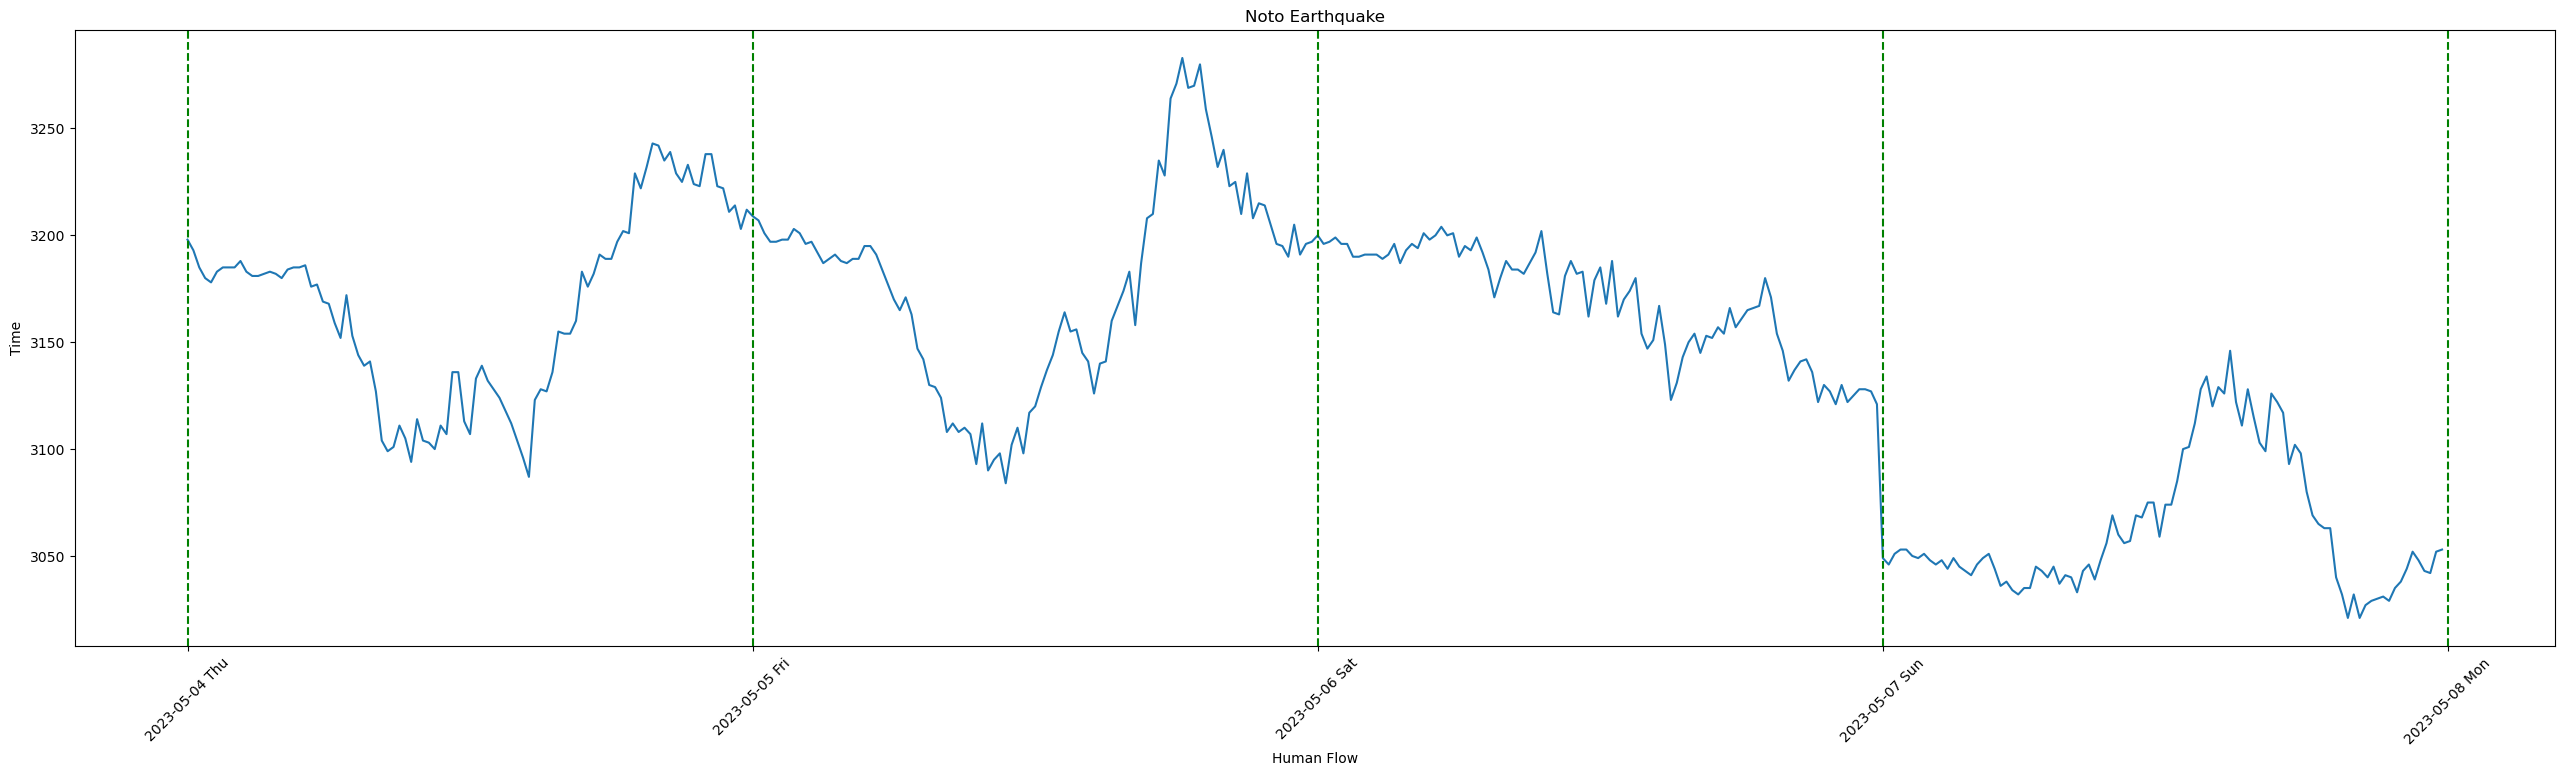

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
3997,2023-05-04 14:55:04,"健康, 教育",社会,日本,番外,2,"石川県, 石川県金沢市",番外２６ 石川で６７人感染,石川県は４日、６７人の新型コロナウイルス感染を確認したと発表した。県内の感染確認は計２８万２...,['17201'],1,"[0, 0, 0, 90, 0, 0, 0, 10, 0, 0]"
4058,2023-05-04 18:40:55,"スポーツ, 教育",野球,日本,記事,3,石川県,松井友、粘ってプロ初白星 楽天の２年目、５回無失点,粘った末に打線の強力援護が待っていた。楽天の２年目、松井友は再三ピンチを迎えながらも５回無失...,"['17201', '17202', '17203', '17204', '17205', ...",19,"[0, 0, 0, 80, 20, 10, 0, 0, 0, 60]"
4059,2023-05-04 18:50:08,"文化, 健康, 教育",社会,日本,記事,3,"群馬県前橋市, 石川県, 群馬県, 石川県金沢市, 東京都, 石川県小松市",こども歌舞伎、堂々熱演 石川・小松、盛大な拍手,歌舞伎十八番の一つ「勧進帳」の舞台として知られる「安宅あたかの関」がある石川県小松市の劇場で...,"['10201', '17201', '13100', '13101', '13102', ...",66,"[0, 10, 30, 80, 0, 0, 0, 0, 0, 40]"
3981,2023-05-04 23:28:48,"災害・事故, 気象",社会,日本,記事,4,"新潟県, 石川県, 新潟県新潟市, 石川県金沢市",新潟、石川で震度１,４日午後１１時１分ごろ、新潟県と石川県で震度１の地震があった。気象庁によると、震源地は新潟県...,"['15101', '15102', '15103', '15104', '15105', ...",9,"[0, 0, 0, 80, 0, 10, 0, 0, 0, 70]"
4097,2023-05-05 14:46:59,災害・事故,社会,日本,フラッシュ,1,"石川県, 石川県金沢市",フラッシュ１ 石川で震度６強,石川県で震度６強。,['17201'],1,"[0, 10, 50, 30, 0, 0, 0, 0, 0, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
4368,2023-05-06 21:32:51,"災害・事故, 教育, 気象",社会,日本,記事,3,"石川県, 石川県金沢市, 石川県珠洲市, 石川県鳳珠郡能登町, 富山県",１６３０人に避難指示 大雨警報、土砂災害厳戒 石川・珠洲、地震５０回超,石川県珠洲市で５日発生した震度６強の地震で、市は６日夕、大雨による土砂災害の危険性が高まって...,"['17201', '17205', '17463', '16201', '16202', ...",18,"[80, 0, 10, 5, 20, 40, 50, 30, 25, 15]"
4370,2023-05-06 21:54:33,"災害・事故, 教育, 気象",社会,日本,記事,3,"石川県, 富山県, 富山県富山市, 石川県金沢市, 石川県輪島市, 石川県珠洲市, 石川県鳳...",１６３０人に避難指示 大雨警報、土砂災害厳戒 石川・珠洲、地震５０回超,石川県珠洲市で５日発生した震度６強の地震で、市は６日夕、大雨による土砂災害の危険性が高まって...,"['16201', '17201', '17204', '17205', '17463']",5,"[10, 0, 0, 20, 0, 0, 40, 30, 15, 0]"
4371,2023-05-06 21:55:03,"災害・事故, 教育, 気象",社会,日本,記事,3,"石川県, 石川県金沢市, 石川県珠洲市, 石川県鳳珠郡能登町, 富山県",１６３０人に避難指示 大雨警報、土砂災害厳戒 石川・珠洲、地震５０回超,石川県珠洲市で５日発生した震度６強の地震で、市は６日夕、大雨による土砂災害の危険性が高まって...,"['17201', '17205', '17463', '16201', '16202', ...",18,"[0, 80, 10, 5, 50, 70, 90, 30, 20, 100]"
4375,2023-05-06 23:51:03,"災害・事故, 教育, 気象",社会,日本,記事,3,"石川県, 富山県, 富山県富山市, 石川県金沢市, 石川県輪島市, 石川県珠洲市, 石川県鳳...",１６３０人に避難指示 大雨警報、土砂災害厳戒 石川・珠洲、地震５０回超,石川県珠洲市で５日発生した震度６強の地震で、市は６日夕、大雨による土砂災害の危険性が高まって...,"['16201', '17201', '17204', '17205', '17463']",5,"[10, 20, 0, 70, 0, 30, 40, 15, 50, 90]"


In [13]:
target_date = '2023-05-06 00:00:00'
window_range = 2
target_region = '石川県金沢市'

target_time = datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S')
target_day = (target_time - start_time).days
idx = code2idx[region2code[target_region]]

# 示例数据
data = [i for day_flow in flows[target_day-window_range:target_day+window_range, :,idx] for i in day_flow.tolist()]

# 创建一个新的图形
plt.figure(figsize=(32, 8))

# 绘制折线图
plt.plot(data)

# 添加标题和标签
plt.title('Noto Earthquake')
plt.xlabel('Human Flow')
plt.ylabel('Time')

#plt.axvline(x=6 * 96 + 16 * 4, color='r', linestyle='--')
for i in range(2 * window_range + 1):
    plt.axvline(x=i * 96, color='green', linestyle='--')

x_positions = [i * 96 for i in range(2 * window_range + 1)]
x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') + ' ' + (datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%a') for i in range(-window_range, window_range + 1)]
plt.xticks(ticks=x_positions, labels=x_labels, rotation=45)    

# 显示图形
plt.show()

x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(-window_range, window_range)]
filtered_news = news[
    (news['DateAndTime'] >= pd.to_datetime(x_labels[0])) & 
    (news['DateAndTime'] <= pd.to_datetime(x_labels[-1])) &
    (news['codes'].str.contains(region2code[target_region]))
]
filtered_news.sort_values(by='DateAndTime')

In [14]:
def vis(target_date, window_range, target_region):
    target_time = datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S')
    target_day = (target_time - start_time).days
    idx = code2idx[region2code[target_region]]

    # 示例数据
    data = [i for day_flow in flows[target_day-window_range:target_day+window_range, :,idx] for i in day_flow.tolist()]

    # 创建一个新的图形
    plt.figure(figsize=(32, 8))

    # 绘制折线图
    plt.plot(data)

    # 添加标题和标签
    #plt.title('Noto Earthquake')
    plt.xlabel('Time')
    plt.ylabel('Human Flow')

    #plt.axvline(x=6 * 96 + 16 * 4, color='r', linestyle='--')
    for i in range(2 * window_range + 1):
        plt.axvline(x=i * 96, color='green', linestyle='--')

    x_positions = [i * 96 for i in range(2 * window_range + 1)]
    x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') + ' ' + (datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%a') for i in range(-window_range, window_range + 1)]
    plt.xticks(ticks=x_positions, labels=x_labels, rotation=45)    

    # 显示图形
    plt.show()

    x_labels = [(datetime.strptime(target_date, '%Y-%m-%d %H:%M:%S') + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(-window_range, window_range)]
    filtered_news = news[
        (news['DateAndTime'] >= pd.to_datetime(x_labels[0])) & 
        (news['DateAndTime'] <= pd.to_datetime(x_labels[-1])) &
        (news['codes'].str.contains(region2code[target_region]))
    ]
    return filtered_news.sort_values(by='DateAndTime')

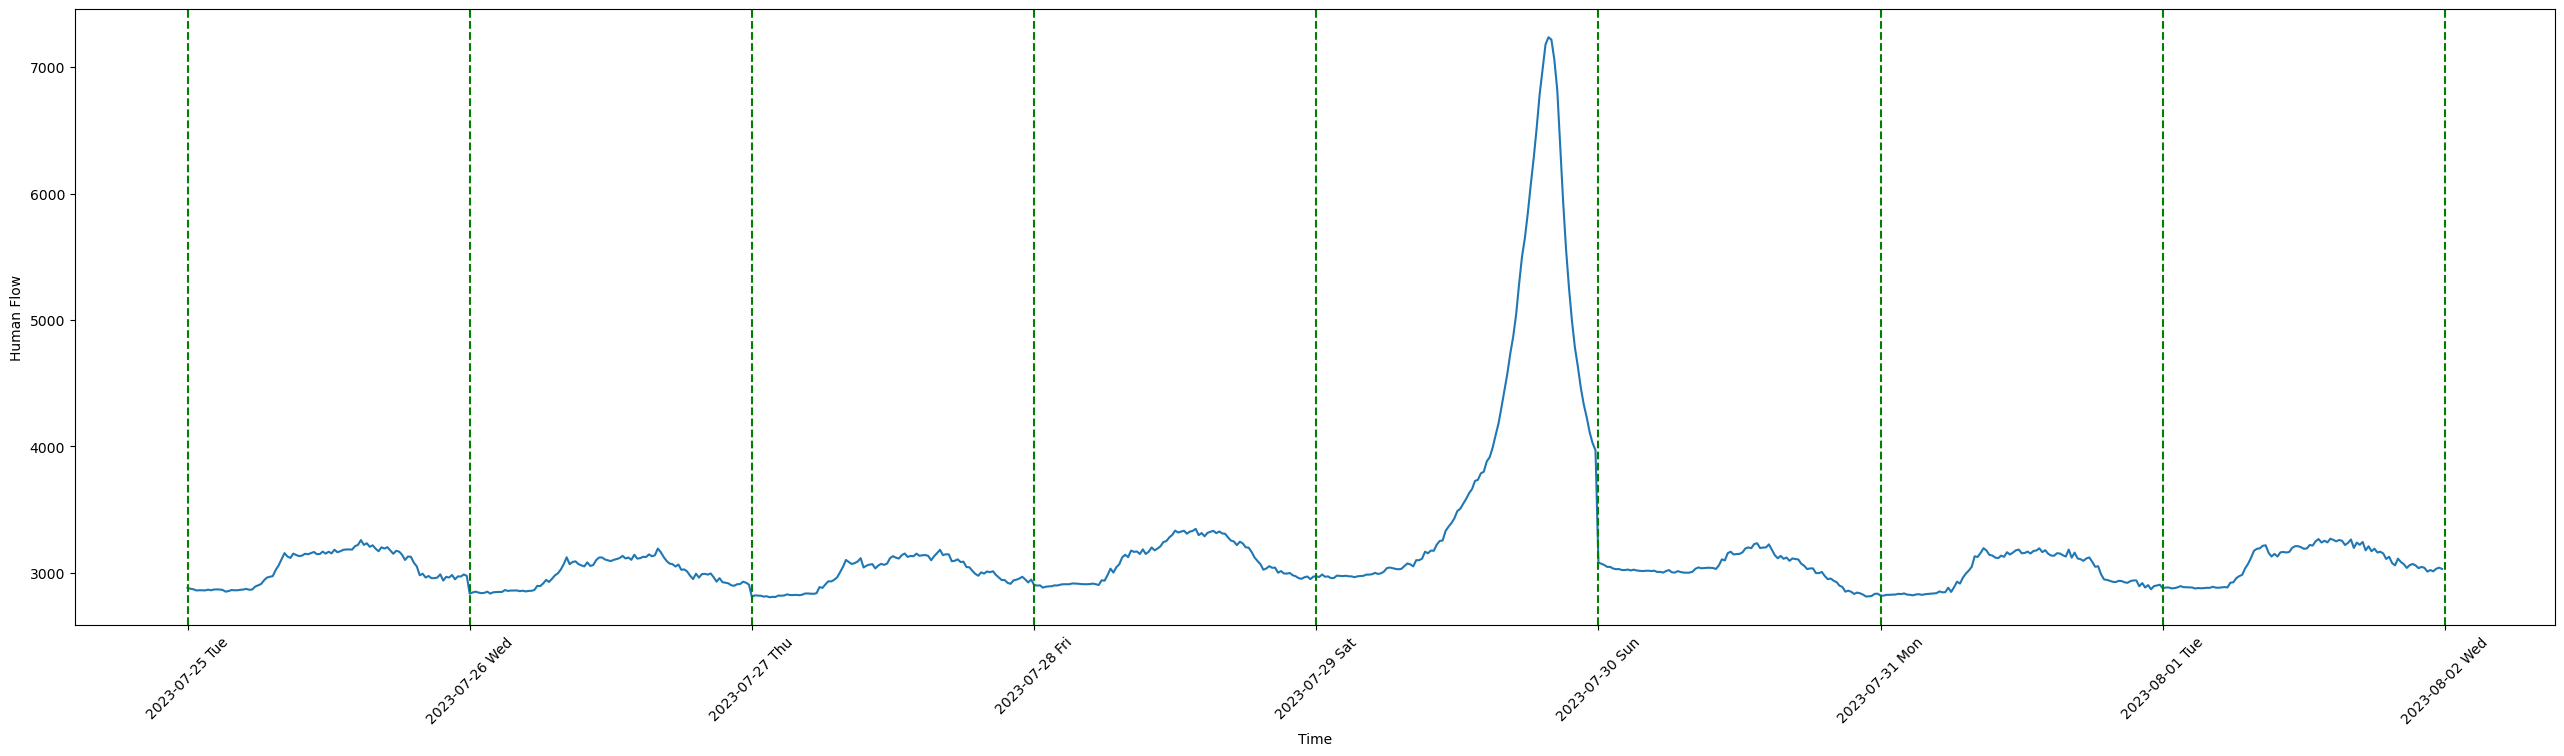

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
12121,2023-07-25 03:00:00,"犯罪・司法, 健康, 文化, 科学・技術, 教育",社会,日本,記事,3,"北海道, 北海道札幌市, 北海道函館市, 北海道旭川市, 北海道釧路市, 東京都",医師なのに「なぜ？」 猟奇目的か、深まる謎,札幌・ススキノのホテルで頭部を持ち去られた男性の遺体が発見された事件で、職業不詳田村瑠奈たむ...,"['01101', '01102', '01103', '01104', '01105', ...",76,"[10, 0, 20, 70, 0, 0, 30, 80, 60, 40]"
12122,2023-07-25 09:55:11,"犯罪・司法, 健康, 文化, 科学・技術, 教育",社会,日本,記事,3,"北海道, 北海道札幌市, 北海道函館市, 北海道旭川市, 北海道釧路市, 東京都",医師なのに「なぜ？」 猟奇目的か、深まる謎,札幌・ススキノのホテルで頭部を持ち去られた男性の遺体が発見された事件で、職業不詳田村瑠奈たむ...,"['01101', '01102', '01103', '01104', '01105', ...",76,"[10, 0, 0, 90, 0, 0, 0, 0, 0, 10]"
12125,2023-07-25 11:08:03,"犯罪・司法, 健康, 文化, 科学・技術, 教育",社会,日本,記事,3,"北海道, 北海道札幌市, 北海道函館市, 北海道旭川市, 北海道釧路市, 東京都",「止められたはずなのに」 札幌死体損壊、識者の見方,札幌・ススキノのホテルで頭部を持ち去られた男性の遺体が発見された事件で、職業不詳田村瑠奈たむ...,"['01101', '01102', '01103', '01104', '01105', ...",76,"[0, 10, 0, 80, 0, 20, 40, 30, 50, 60]"
12127,2023-07-25 11:37:29,"社会, 文化, 教育, 健康",社会,日本,記事,3,"千葉県, 鹿児島県, 千葉県千葉市, 鹿児島県鹿児島市, 東京都",紀子さまがコロナ感染 宮内庁、２９日まで療養,宮内庁は２５日、秋篠宮妃紀子さまが新型コロナウイルスに感染されたと発表した。２４日夕に発熱の...,"['12101', '12102', '12103', '12104', '12105', ...",70,"[10, 0, 0, 90, 0, 0, 5, 0, 0, 10]"
12175,2023-07-25 12:42:52,"生活・余暇, スポーツ",運Ｒ,日本,記事,3,"三重県津市, 東京都, 滋賀県",レディースＣをＰＲ ８月１日から津で,ボートレースの第３７回レディースチャンピオン（８月１日～６日・津、プレミアムＧⅠ）のＰＲに、...,"['24201', '13100', '13101', '13102', '13103', ...",83,"[90, 0, 10, 50, 20, 30, 70, 40, 60, 80]"
...,...,...,...,...,...,...,...,...,...,...,...,...
12825,2023-07-31 15:59:49,犯罪・司法,社会,日本,番外,2,東京都,番外３６ 乗客２人への殺人未遂罪は成立せず,京王線刺傷事件で服部恭太はっとり・きょうた被告（２６）を懲役２３年とした東京地裁立川支部判決...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 10, 0, 80, 20, 30, 40, 5, 15, 50]"
12846,2023-07-31 18:26:05,"犯罪・司法, 文化, 社会",社会,日本,番外,2,東京都,番外４６ 市川猿之助被告の保釈決定に対する検察側の準抗告棄却,東京地裁は３１日、両親の自殺を手助けしたとして、自殺ほう助の罪で起訴された歌舞伎俳優市川猿之...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[10, 0, 0, 80, 5, 0, 20, 5, 15, 50]"
12855,2023-07-31 20:08:07,スポーツ,運動,日本,記事,3,東京都,国立競技場の業者公募開始 民営化、公費負担減を重視,日本スポーツ振興センター（ＪＳＣ）は３１日、国立競技場の民営化を担う事業者の公募を始めた。事...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[90, 0, 0, 10, 5, 0, 5, 20, 70, 80]"
12860,2023-07-31 21:53:43,"スポーツ, 教育",高体,日本,記事,3,"千葉県, 北海道函館市, 北海道, 東京都, 長崎県",ハンド女子は白梅学園初Ｖ 高校総体、男子は香川中央,全国高校総体（インターハイ）第１０日は３１日、北海道函館市の函館アリーナなどで行われ、ハンド...,"['12101', '12102', '12103', '12104', '12105', ...",150,"[0, 0, 10, 90, 0, 0, 0, 5, 0, 30]"


In [15]:
#隅田川花火大会
target_date = '2023-07-29 00:00:00'
window_range = 4
target_region = '東京都墨田区'
vis(target_date, window_range, target_region)

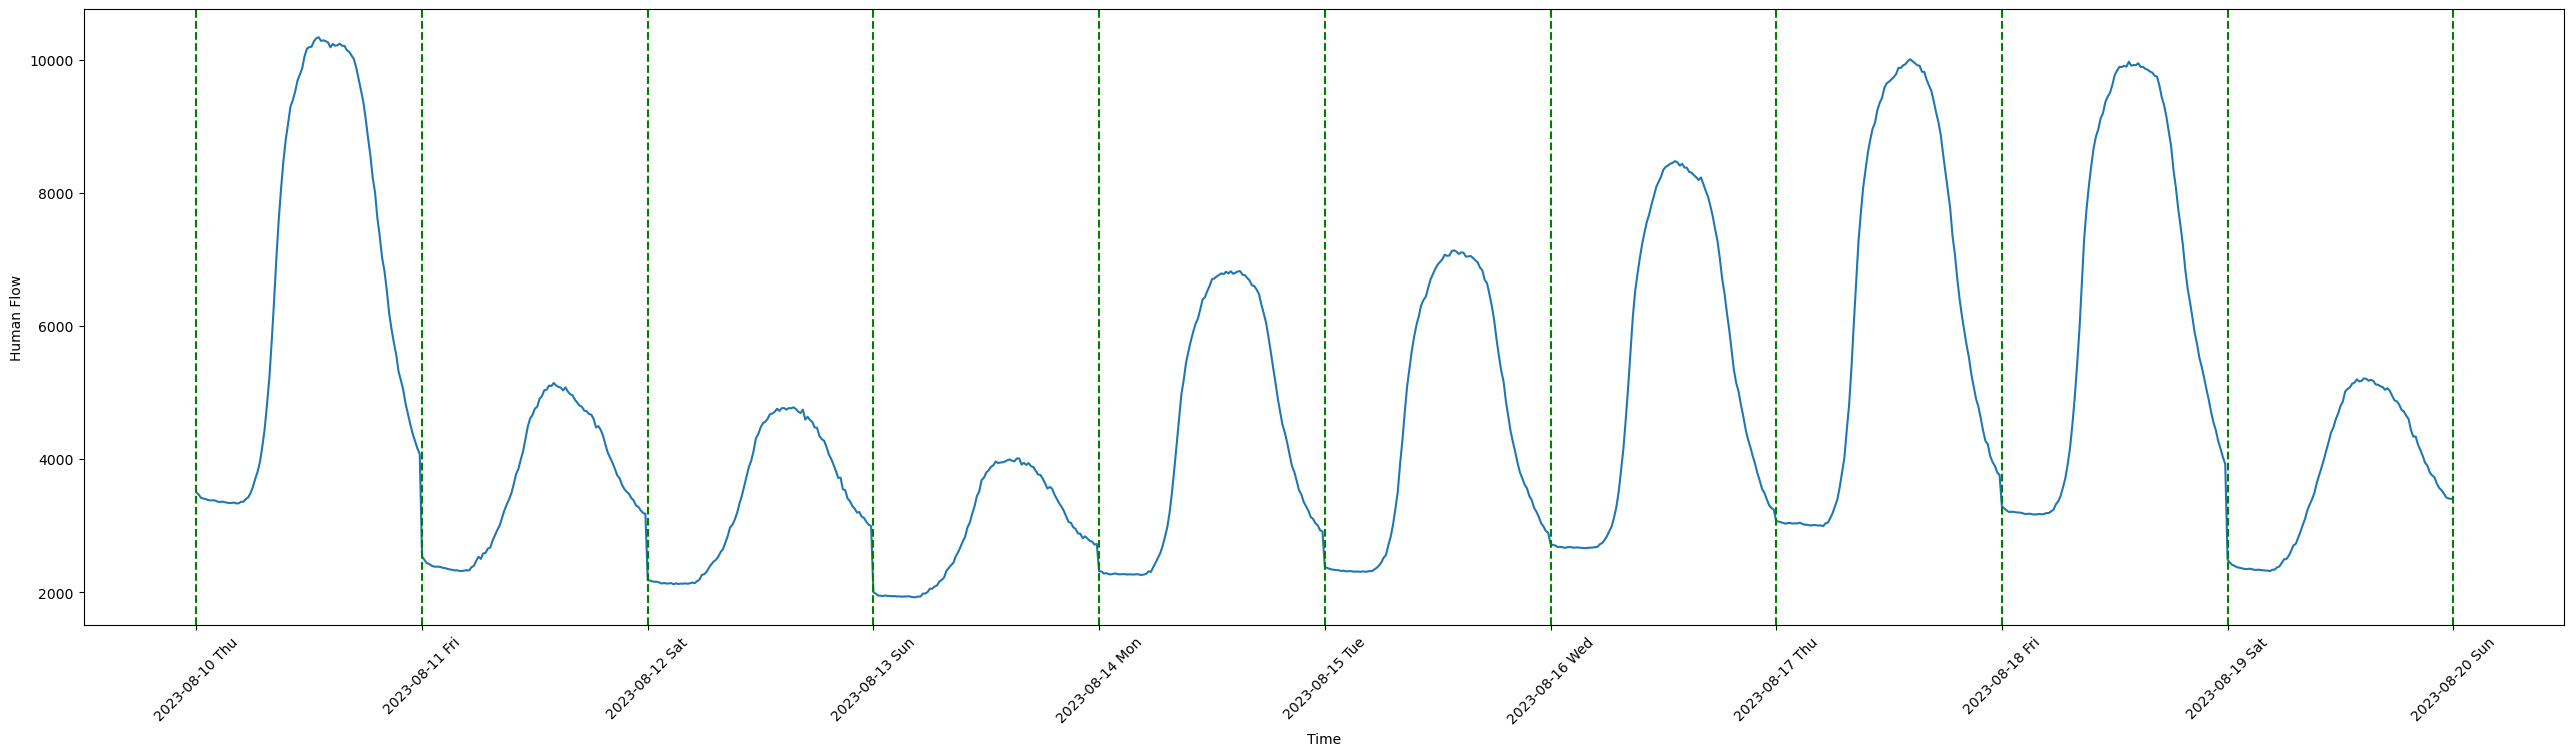

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
13696,2023-08-10 08:18:05,"犯罪・司法, スポーツ, 教育",社会,日本,番外,2,東京都,番外１１ 大麻所持疑い、東農大ボクシング部員３人目逮捕,大麻取締法違反容疑で東京農大ボクシング部の部員らが逮捕された事件で、警視庁は１０日までに大麻...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 0, 0, 100, 0, 0, 0, 0, 0, 10]"
13722,2023-08-10 08:51:45,"気象, 災害・事故, 環境",社会,日本,記事,3,東京都,台風７号、小笠原接近へ 暴風域伴い列島近づく恐れ,台風７号は１０日、小笠原近海を西寄りに進んだ。発達しながら北西に進み、１２日にかけ小笠原諸島...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 5, 0, 95, 10, 20, 40, 0, 50, 60]"
13725,2023-08-10 10:12:20,"気象, 災害・事故, 環境",社会,日本,記事,3,東京都,台風７号、小笠原接近 暴風域伴い列島近づく恐れ,台風７号は１０日、小笠原近海を西寄りに進んだ。台風７号は１０日、小笠原諸島・父島の南東を西に...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 20, 0, 70, 30, 50, 40, 10, 20, 100]"
13729,2023-08-10 10:42:30,スポーツ,運外,日本,記事,3,"岩手県, 東京都",世界の強豪相手に躍動 中野、悲願の五輪金へ決意,世界の舞台で強豪相手に躍動した。２４歳の新鋭、中野が男子ケイリンで３位。３年前に東京五輪代表...,"['03201', '03202', '03203', '03205', '03206', ...",96,"[10, 0, 0, 80, 0, 0, 20, 0, 0, 50]"
13730,2023-08-10 10:54:02,スポーツ,運外,日本,記事,3,東京都,精彩欠く梶原 自転車から（１）,〇…女子オムニアムで東京五輪銀メダルの梶原は８位と精彩を欠き、「本当に力不足」と落胆した。３...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 20, 85, 30, 0, 0, 10, 5, 0, 50]"
...,...,...,...,...,...,...,...,...,...,...,...,...
14473,2023-08-18 16:46:24,スポーツ,運Ｊ,日本,記事,3,"秋田県, 山形県, 東京都, 京都府, 岡山県, 鹿児島県, 岩手県, 栃木県, 岐阜県, 大阪府",１９日のＪリーグ,◇明治安田Ｊ１第２４節第２日鹿島―鳥栖（１８時・カシマ）京都―札幌（１９時・サンガＳ）Ｇ大阪...,"['05201', '05202', '05203', '05204', '05206', ...",451,"[0, 10, 20, 60, 0, 30, 50, 0, 40, 70]"
14474,2023-08-18 16:46:26,スポーツ,運Ｊ,日本,記事,3,"秋田県, 山形県, 東京都, 京都府, 岡山県, 鹿児島県, 岩手県, 栃木県, 岐阜県, 大阪府",１９日のＪリーグ,◇明治安田Ｊ１第２４節第２日鹿島―鳥栖（１８時・カシマ）京都―札幌（１９時・サンガＳ）Ｇ大阪...,"['05201', '05202', '05203', '05204', '05206', ...",451,"[10, 0, 0, 90, 0, 0, 0, 0, 0, 10]"
14513,2023-08-18 19:12:28,"社会, 教育",社会,日本,記事,3,"神奈川県横浜市, 東京都",菅野道夫氏死去 東工大名誉教授,菅野道夫氏（すげの・みちお＝東京工業大名誉教授、ファジー理論）９日死去、８３歳。横浜市出身。...,"['14101', '14102', '14103', '14104', '14105', ...",81,"[0, 0, 0, 90, 0, 0, 0, 0, 0, 20]"
14518,2023-08-18 19:45:56,"教育, 社会",社会,日本,記事,3,"神奈川県横浜市, 神奈川県横浜市緑区, 東京都",大門正機氏死去 東工大名誉教授,大門正機氏（だいもん・まさき＝東京工業大名誉教授、無機材料・セメント化学）１７日死去、７９歳...,"['14113', '13100', '13101', '13102', '13103', ...",64,"[0, 0, 0, 90, 0, 0, 0, 0, 10, 60]"


In [163]:
#お盆
target_date = '2023-08-15 00:00:00'
window_range = 5 
target_region = '東京都中央区'
vis(target_date, window_range, target_region)

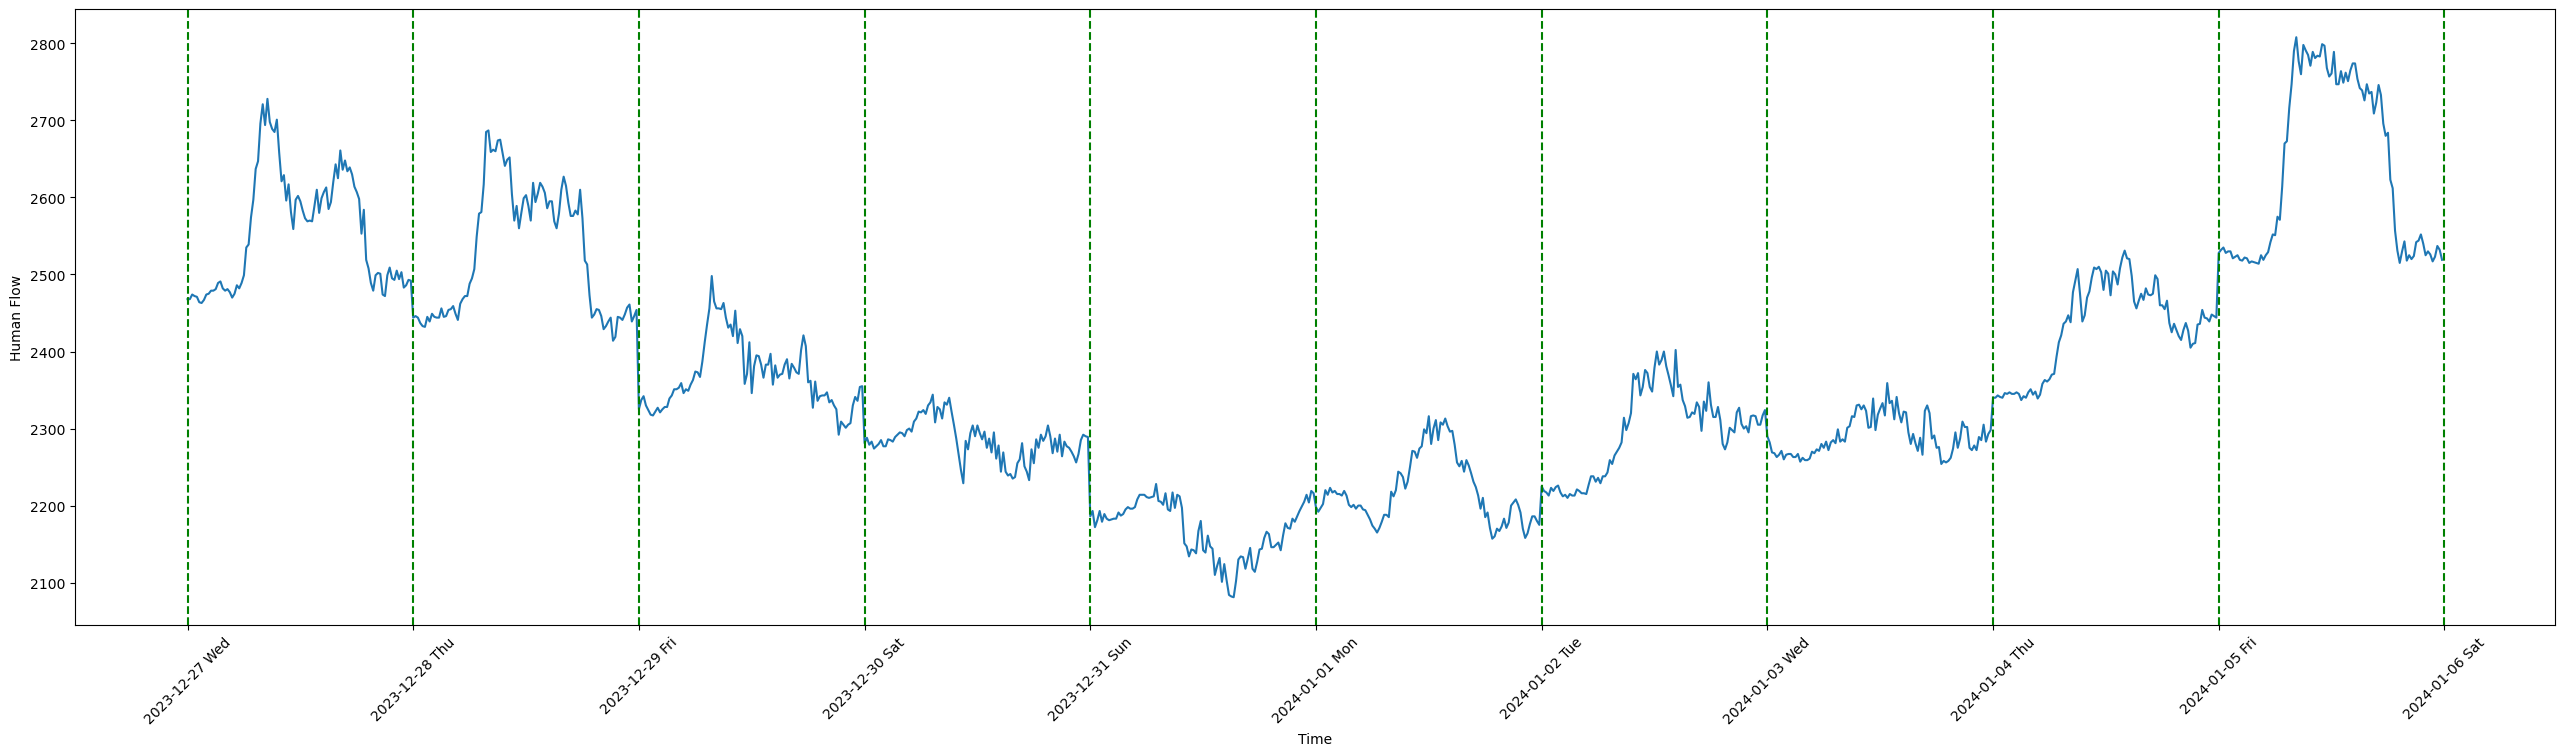

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
26143,2023-12-27 10:35:10,スポーツ,運Ｒ,日本,記事,3,京都府,本命はシンエンペラー 競馬のホープフルＳ枠順,第４０回ホープフルステークス（２８日・中山１１Ｒ２０００㍍芝１８頭、ＧⅠ）枠順が２６日に決ま...,"['13206', '26101', '26102', '26103', '26104', ...",48,"[0, 10, 90, 15, 5, 0, 0, 0, 0, 50]"
26144,2023-12-27 10:41:14,スポーツ,運Ｒ,日本,記事,3,京都府,本命はシンエンペラー 競馬のホープフルＳ枠順,第４０回ホープフルステークス（２８日・中山１１Ｒ２０００㍍芝１８頭、ＧⅠ）枠順が２６日に決ま...,"['13206', '26101', '26102', '26103', '26104', ...",48,"[0, 20, 60, 80, 10, 0, 0, 0, 0, 50]"
26195,2023-12-27 14:43:53,スポーツ,運Ｊ,日本,記事,3,京都府,京都に鈴木が加入 Ｊリーグだより（１）,〇…Ｊ１京都は２７日、Ｊ２清水からＤＦ鈴木義宜すずき・よしのり（３１）が加入すると発表した。,"['13206', '26101', '26102', '26103', '26104', ...",48,"[0, 10, 5, 40, 20, 0, 0, 0, 0, 90]"
26196,2023-12-27 14:52:06,"スポーツ, 教育",運動,日本,記事,3,"京都府, 岐阜県, 北海道, 東京都",京都精華と岐阜女が決勝へ 全国高校バスケ第５日,バスケットボールの全国高校選手権第５日は２７日、東京体育館で女子準決勝が行われ、２８日の決勝...,"['13206', '26101', '26102', '26103', '26104', ...",357,"[10, 0, 0, 90, 0, 0, 0, 0, 0, 10]"
26200,2023-12-27 15:37:13,スポーツ,野球,日本,記事,3,"京都府, 大阪府",今江敏晃監督の略歴,今江敏晃（いまえ・としあき）大阪・ＰＬ学園高から０２年にドラフト３巡目でロッテ入団。三塁手と...,"['13206', '26101', '26102', '26103', '26104', ...",151,"[0, 20, 10, 80, 0, 0, 0, 0, 0, 30]"
26205,2023-12-27 16:16:03,"スポーツ, 教育",運動,日本,記事,3,"岐阜県, 京都府",岐阜女、３０点差でやり返す 高校バスケから（１）,＊…岐阜女は準々決勝で大逆転勝ちした勢いを生かし、準優勝だった２０１９年大会以来の決勝進出を...,"['21201', '21202', '21203', '21204', '21205', ...",90,"[0, 20, 30, 50, 10, 20, 40, 5, 10, 70]"
26208,2023-12-27 16:39:11,スポーツ,運Ｊ,日本,記事,3,"京都府, 大阪府",浦和に井上、佐藤が加入 Ｊリーグだより（５）,〇…Ｊ１浦和は２７日、京都のＤＦ井上黎生人いのうえ・りきと（２６）とＧ大阪のＤＦ佐藤瑶大さと...,"['13206', '26101', '26102', '26103', '26104', ...",151,"[0, 10, 50, 40, 20, 30, 0, 0, 0, 80]"
26029,2023-12-27 16:45:17,"犯罪・司法, 文化, 社会",大社,日本,記事,3,"京都府, 京都府京都市, 京都府京都市伏見区, 京都府宇治市",伝える碑のデザイン案公表 京アニ放火殺人、遺族ら,３６人が死亡した２０１９年の京都アニメーション放火殺人事件を伝える碑の設置を目指している会が...,"['26109', '26204']",2,"[0, 0, 0, 20, 0, 0, 0, 0, 0, 40]"
26220,2023-12-27 17:35:31,"スポーツ, 教育",運動,日本,記事,3,"京都府, 岐阜県, 北海道, 東京都",京都精華と岐阜女が決勝へ 全国高校バスケ第５日,バスケットボールの全国高校選手権第５日は２７日、東京体育館で行われ、２８日の女子決勝は全国高...,"['13206', '26101', '26102', '26103', '26104', ...",357,"[0, 20, 10, 80, 0, 0, 0, 0, 0, 40]"
26226,2023-12-27 18:05:16,"スポーツ, 教育",運動,日本,記事,3,"京都府, 宮崎県, 岡山県, 青森県, 大阪府, 青森県青森市, 京都府京都市, 岡山県岡山...",現役高校生が主審務める 全国高校ラグビー大会で初,第１０３回全国高校ラグビー大会第１日は２７日、大阪府東大阪市の花園ラグビー場で行われ、１回戦...,"['02201', '26101', '26102', '26103', '26104', ...",18,"[0, 10, 50, 70, 0, 0, 0, 30, 0, 20]"


In [16]:
target_date = '2024-01-01 00:00:00'
window_range = 5 
target_region = '京都府京都市伏見区'
vis(target_date, window_range, target_region)

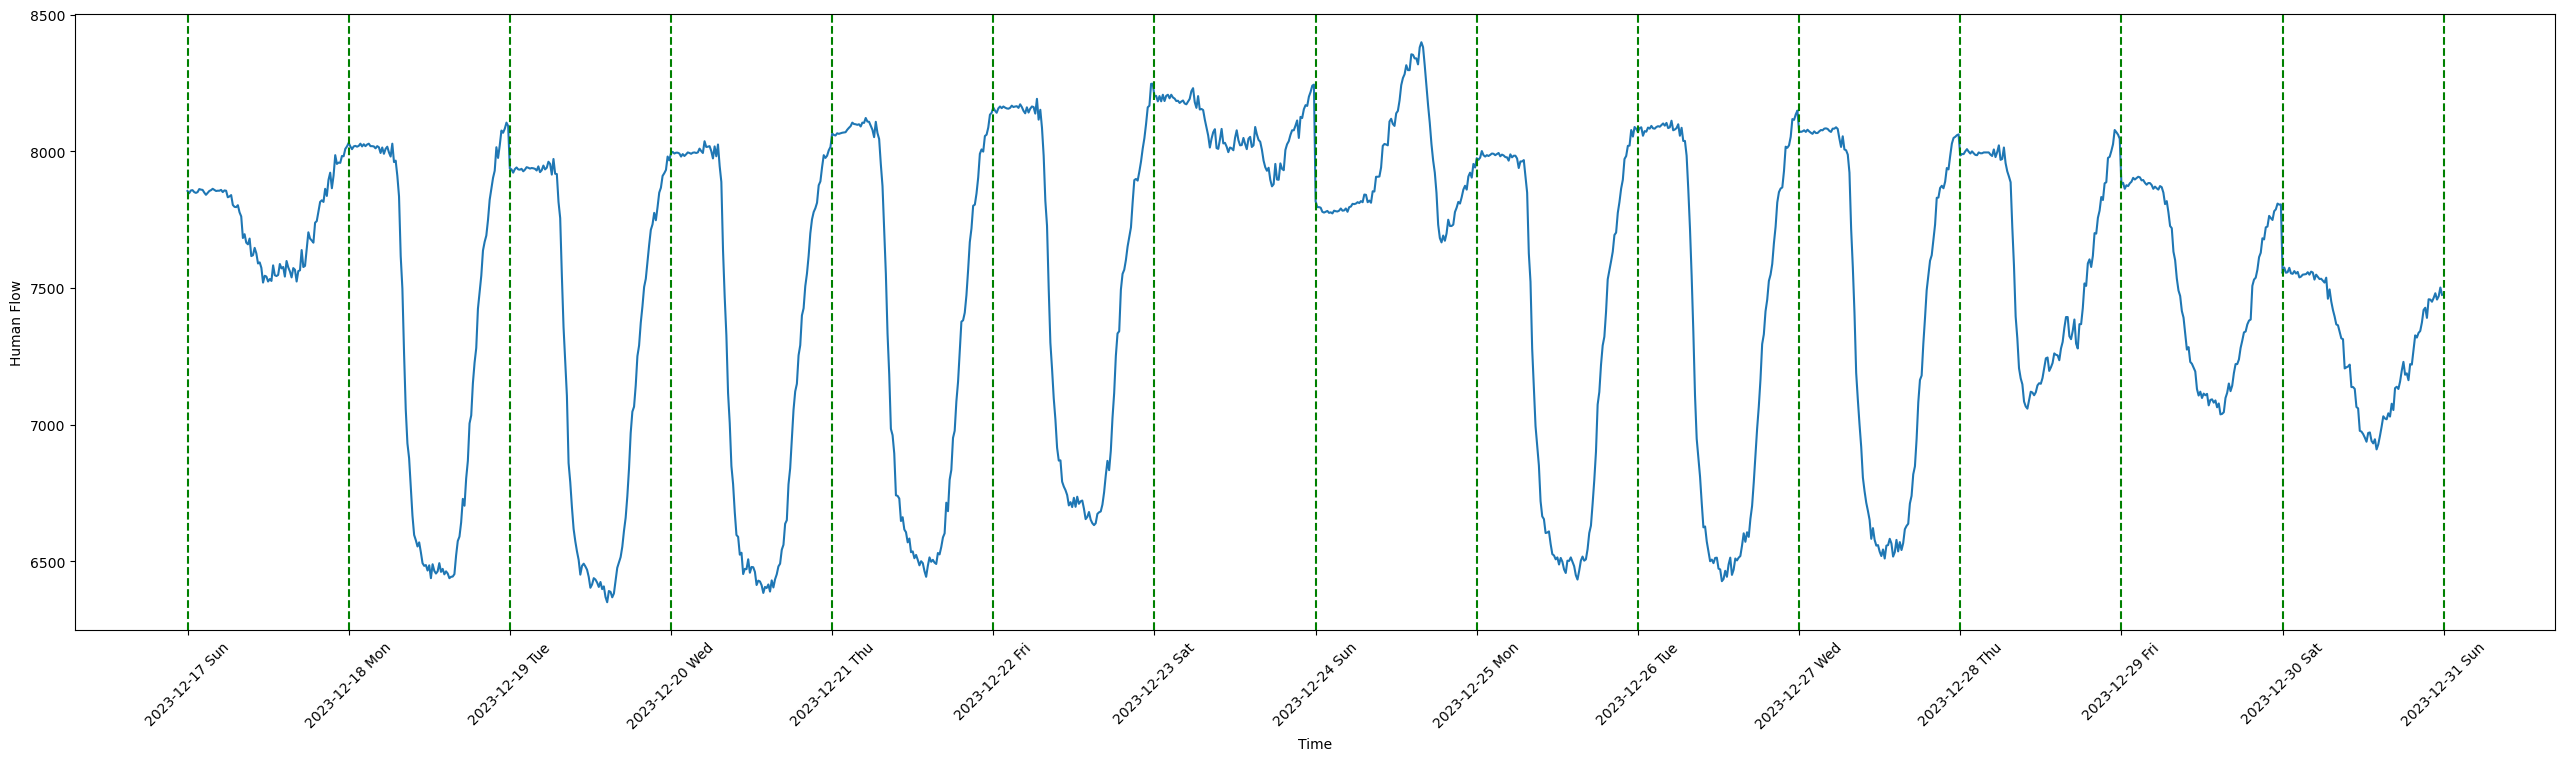

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
25363,2023-12-17 15:12:01,"災害・事故, 気象",社会,日本,記事,3,"栃木県, 福島県, 千葉県, 茨城県, 山梨県, 長野県, 群馬県, 埼玉県, 福島県福島市...",茨城と栃木で震度３ Ｍ４・３,１７日午後２時１１分ごろ、茨城県と栃木県で震度３の地震があった。気象庁によると、震源地は栃木...,"['09201', '09202', '09203', '09204', '09205', ...",313,"[0, 5, 10, 70, 0, 0, 0, 20, 0, 80]"
25379,2023-12-17 18:04:18,スポーツ,運Ｒ,日本,記事,3,"千葉県, 熊本県, 宮崎県, 徳島県, 長崎県, 群馬県, 埼玉県, 沖縄県",競輪の佐世保記念成績,◇競輪佐世保開設７３周年記念（１７日・佐世保、ＧⅢ）▽決勝２０２５㍍（５周＝先頭固定）①荒井...,"['12101', '12102', '12103', '12104', '12105', ...",348,"[0, 0, 10, 90, 0, 0, 0, 0, 0, 30]"
25382,2023-12-17 18:31:39,スポーツ,運動,日本,記事,3,"千葉県, 青森県, 新潟県, 静岡県",Ａ千葉、１３連勝で２１勝目 バスケＢリーグ２部,バスケットボール男子のＢリーグ２部（Ｂ２）は１７日、千葉ポートアリーナなどで５試合が行われ、...,"['12101', '12102', '12103', '12104', '12105', ...",195,"[0, 0, 10, 90, 0, 0, 0, 0, 0, 10]"
25706,2023-12-21 17:28:53,"文化, 社会, 教育",社会,日本,記事,3,"千葉県, 千葉県千葉市, 千葉県船橋市",良い子に贈り物だなっしー サンタ姿で、船橋市キャラ,千葉県船橋市の非公認キャラクター「ふなっしー」が２１日、サンタクロース姿で地元の幼稚園や子ど...,"['12101', '12102', '12103', '12104', '12105', ...",7,"[5, 0, 80, 40, 10, 20, 30, 50, 70, 90]"
25709,2023-12-21 17:49:14,"スポーツ, 健康",野球,日本,記事,3,千葉県,今江監督が病院訪問 球界だより（５）,＊…楽天の今江監督が２１日、千葉県こども病院を訪問した。ロッテに選手で在籍した２００９年から...,"['12101', '12102', '12103', '12104', '12105', ...",65,"[10, 0, 0, 80, 0, 0, 0, 5, 0, 60]"
25760,2023-12-22 11:51:21,"災害・事故, 気象, 科学・技術, 教育",社会,日本,記事,3,"青森県, 福島県, 千葉県, 北海道, 北海道札幌市, 青森県青森市, 岩手県, 岩手県盛岡...",日本海溝、地震速報遅れ １月９、１０日、保守点検で,気象庁は２２日、日本海溝海底地震津波観測網「Ｓ―ｎｅｔ」を保守点検する影響で、来年１月９日に...,"['07201', '07202', '07203', '07204', '07205', ...",141,"[80, 10, 0, 50, 20, 0, 30, 10, 40, 90]"
25489,2023-12-22 14:23:05,"スポーツ, 教育",運動,日本,記事,3,"大阪府, 福岡県, 千葉県, 福井県, 奈良県, 大阪府東大阪市, 神奈川県, 東京都, 広島県",東福岡、桐蔭学園の争いか 佐賀工や大阪勢も有力,第１０３回全国高校ラグビー大会は２７日、５１校が参加して大阪府東大阪市の花園ラグビー場で開幕...,"['40101', '40103', '40105', '40106', '40107', ...",395,"[0, 20, 0, 70, 10, 0, 30, 5, 15, 60]"
25809,2023-12-22 20:23:33,"健康, スポーツ",運動,日本,記事,3,千葉県,千葉、復活の舞 フィギュアから（３）,〇…ＧＰシリーズは不振だった昨季四大陸選手権３位の千葉が、復活の舞を見せた。三つのジャンプに...,"['12101', '12102', '12103', '12104', '12105', ...",65,"[0, 0, 10, 80, 0, 0, 0, 0, 0, 20]"
24187,2023-12-23 08:15:00,"生活・余暇, 教育",社会,日本,記事,3,"秋田県, 山形県, 千葉県, 静岡県, 愛知県名古屋市, 山梨県甲府市, 香川県, 栃木県,...",藤井八冠、来年は来てね 対局予定３度、全てお流れ 甲府の将棋タイトル戦定宿,来てくれないのも強さの証明―。今年の将棋界で藤井聡太ふじい・そうた八冠（２１）が全て制したタ...,"['12101', '12102', '12103', '12104', '12105', ...",171,"[0, 20, 85, 20, 0, 0, 0, 0, 60]"
24188,2023-12-23 11:58:27,"生活・余暇, 教育",社会,日本,記事,3,"秋田県, 山形県, 千葉県, 静岡県, 愛知県名古屋市, 山梨県甲府市, 香川県, 栃木県,...",藤井八冠、来年は来てね 対局予定３度、全てお流れ 甲府の将棋タイトル戦定宿 強さ証明、ライバ...,来てくれないのも強さの証明―。今年の将棋界で藤井聡太ふじい・そうた八冠（２１）が全て制したタ...,"['12101', '12102', '12103', '12104', '12105', ...",171,"[0, 20, 85, 20, 0, 0, 0, 0, 0, 60]"


In [168]:
#有馬記念
target_date = '2023-12-24 00:00:00'
window_range = 7
target_region = '千葉県船橋市'
vis(target_date, window_range, target_region)

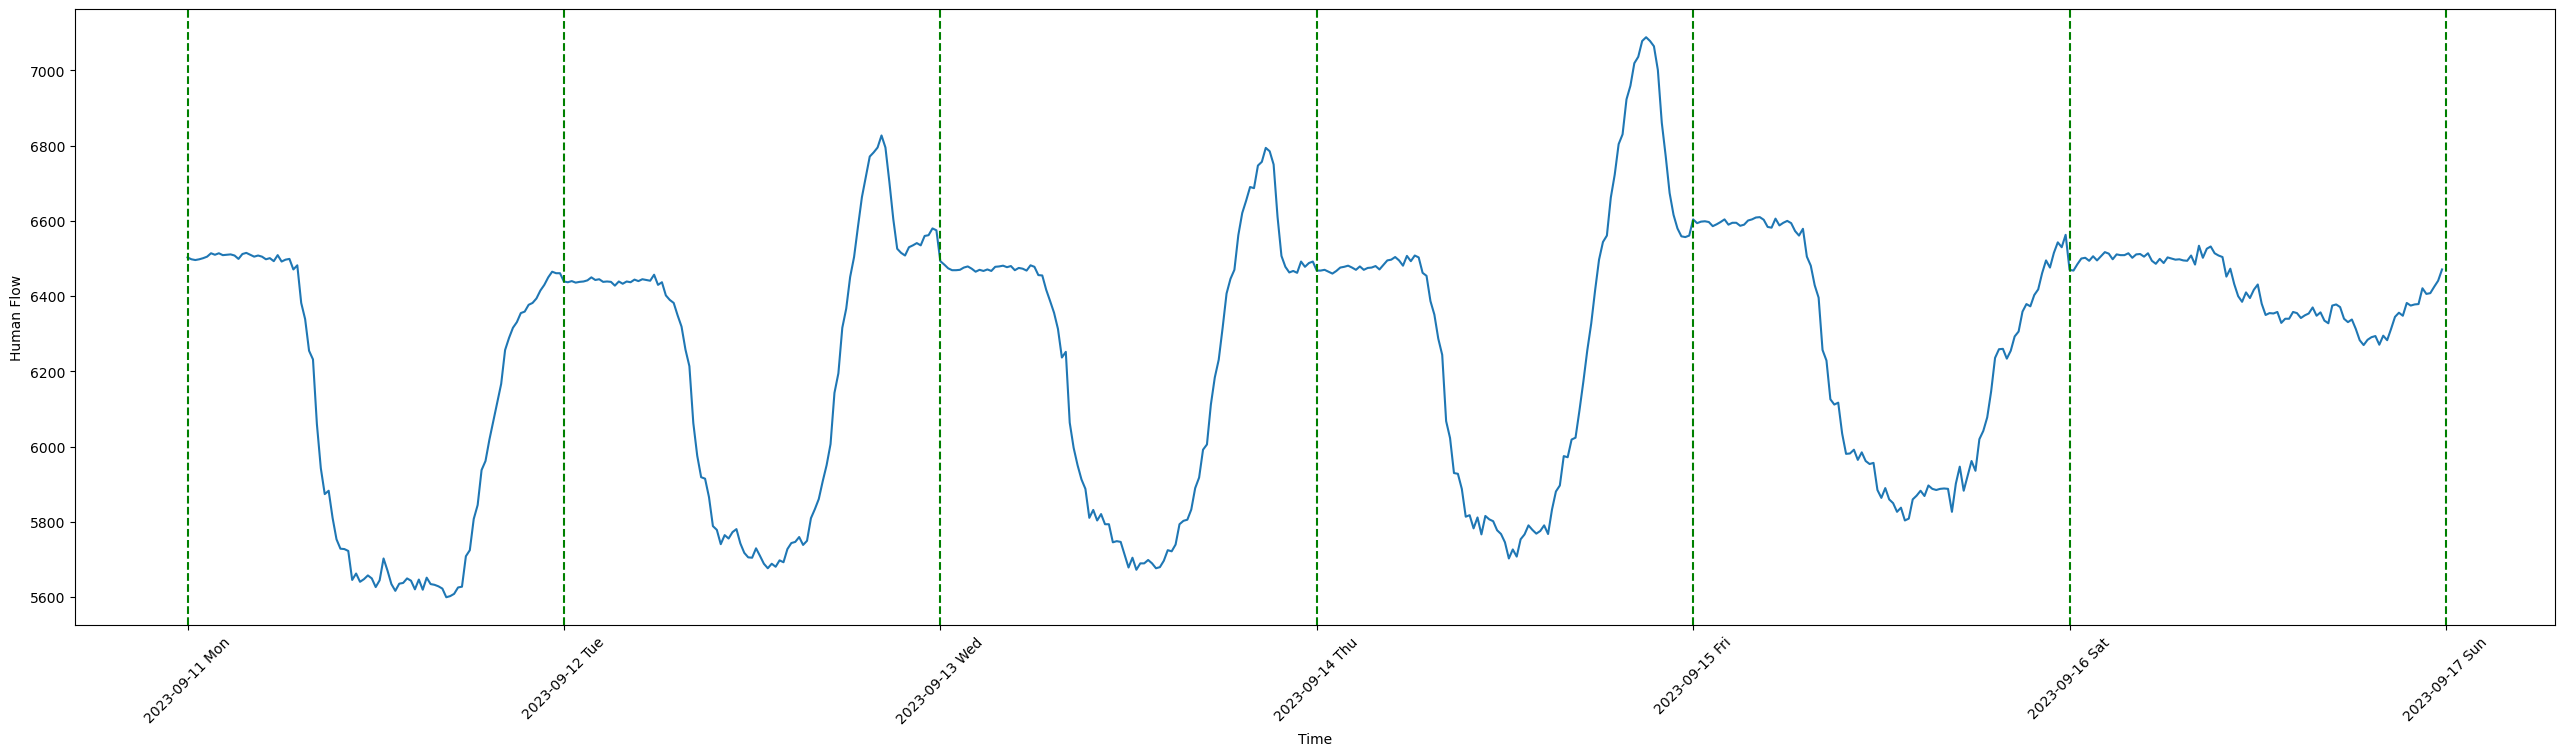

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
16853,2023-09-13 20:18:45,スポーツ,高野,日本,記事,3,"神奈川県, 兵庫県, 広島県",真鍋、堀らがプロ志望届 日本高野連,日本高野連は１３日、公式サイトに掲載するプロ野球志望届提出者を更新し、春夏を通じて甲子園大会...,"['14101', '14102', '14103', '14104', '14105', ...",182,"[0, 10, 40, 30, 0, 0, 0, 0, 0, 80]"
16897,2023-09-14 20:50:03,スポーツ,野球,日本,番外,2,"兵庫県西宮市, 兵庫県",番外７１ 阪神が１８年ぶりのリーグ制覇,プロ野球阪神は１４日、兵庫県西宮市の甲子園球場で行われた巨人戦に勝ち、１８年ぶり６度目のセ・...,['28204'],1,"[0, 0, 20, 80, 0, 0, 0, 0, 0, 40]"
16960,2023-09-14 20:57:28,"スポーツ, 健康",野球,日本,記事,3,兵庫県,才木、大一番でも冷静 ８勝目、優勝導く,大一番で先発を任されても、冷静だった。阪神の才木は「気負うこともない。いつも通りやればええや...,"['28101', '28102', '28105', '28106', '28107', ...",58,"[0, 0, 0, 80, 0, 0, 0, 0, 0, 60]"
15141,2023-09-14 20:58:20,スポーツ,野球,日本,記事,3,"大阪府, 兵庫県, 兵庫県神戸市, 兵庫県西宮市",阪神が１８年ぶりリーグ優勝 岡田監督、０５年に続き栄冠,プロ野球阪神は１４日、兵庫県西宮市の甲子園球場での巨人戦に４―３で勝ち、１８年ぶり６度目のセ...,"['27102', '27103', '27104', '27106', '27107', ...",113,"[0, 30, 40, 50, 0, 10, 20, 0, 0, 80]"
15142,2023-09-14 21:14:31,スポーツ,野球,日本,記事,3,"大阪府, 兵庫県, 兵庫県神戸市, 兵庫県西宮市",阪神が１８年ぶりリーグ優勝 岡田監督、０５年に続き栄冠,プロ野球阪神は１４日、兵庫県西宮市の甲子園球場での巨人戦に４―３で勝ち、１８年ぶり６度目のセ...,"['27102', '27103', '27104', '27106', '27107', ...",113,"[0, 10, 80, 30, 0, 0, 0, 20, 0, 40]"
16969,2023-09-14 22:05:08,スポーツ,野球,日本,記事,3,兵庫県,ベンチ飛び出す阪神ナイン 大歓声、合唱に笑顔と涙,高々と打ち上がった飛球を中野拓夢なかの・たくむ内野手（２７）がつかむと、阪神のベンチから選手...,"['28101', '28102', '28105', '28106', '28107', ...",58,"[0, 20, 85, 20, 0, 0, 0, 0, 0, 60]"
17037,2023-09-15 15:13:07,スポーツ,運Ｊ,日本,記事,3,"兵庫県, 広島県",Ｊ１神戸も「アレ」目指す,〇…サッカーのＪ１で首位に立つ神戸が、プロ野球阪神のセ・リーグ制覇を刺激にしている。敵地での...,"['28101', '28102', '28105', '28106', '28107', ...",96,"[0, 30, 20, 70, 10, 5, 15, 25, 10, 80]"
17059,2023-09-15 20:25:33,スポーツ,運動,日本,記事,3,兵庫県,上地完勝「緊張した」 女子テニスから（１）,〇…上地は相手に１ゲームも与えなかった。日本で観客も多く「変な試合はできないなと、グランドス...,"['28101', '28102', '28105', '28106', '28107', ...",58,"[0, 30, 10, 60, 20, 5, 0, 10, 0, 40]"


In [185]:
#阪神タイガース
target_date = '2023-09-14 00:00:00'
window_range = 3
target_region = '兵庫県西宮市'
vis(target_date, window_range, target_region)

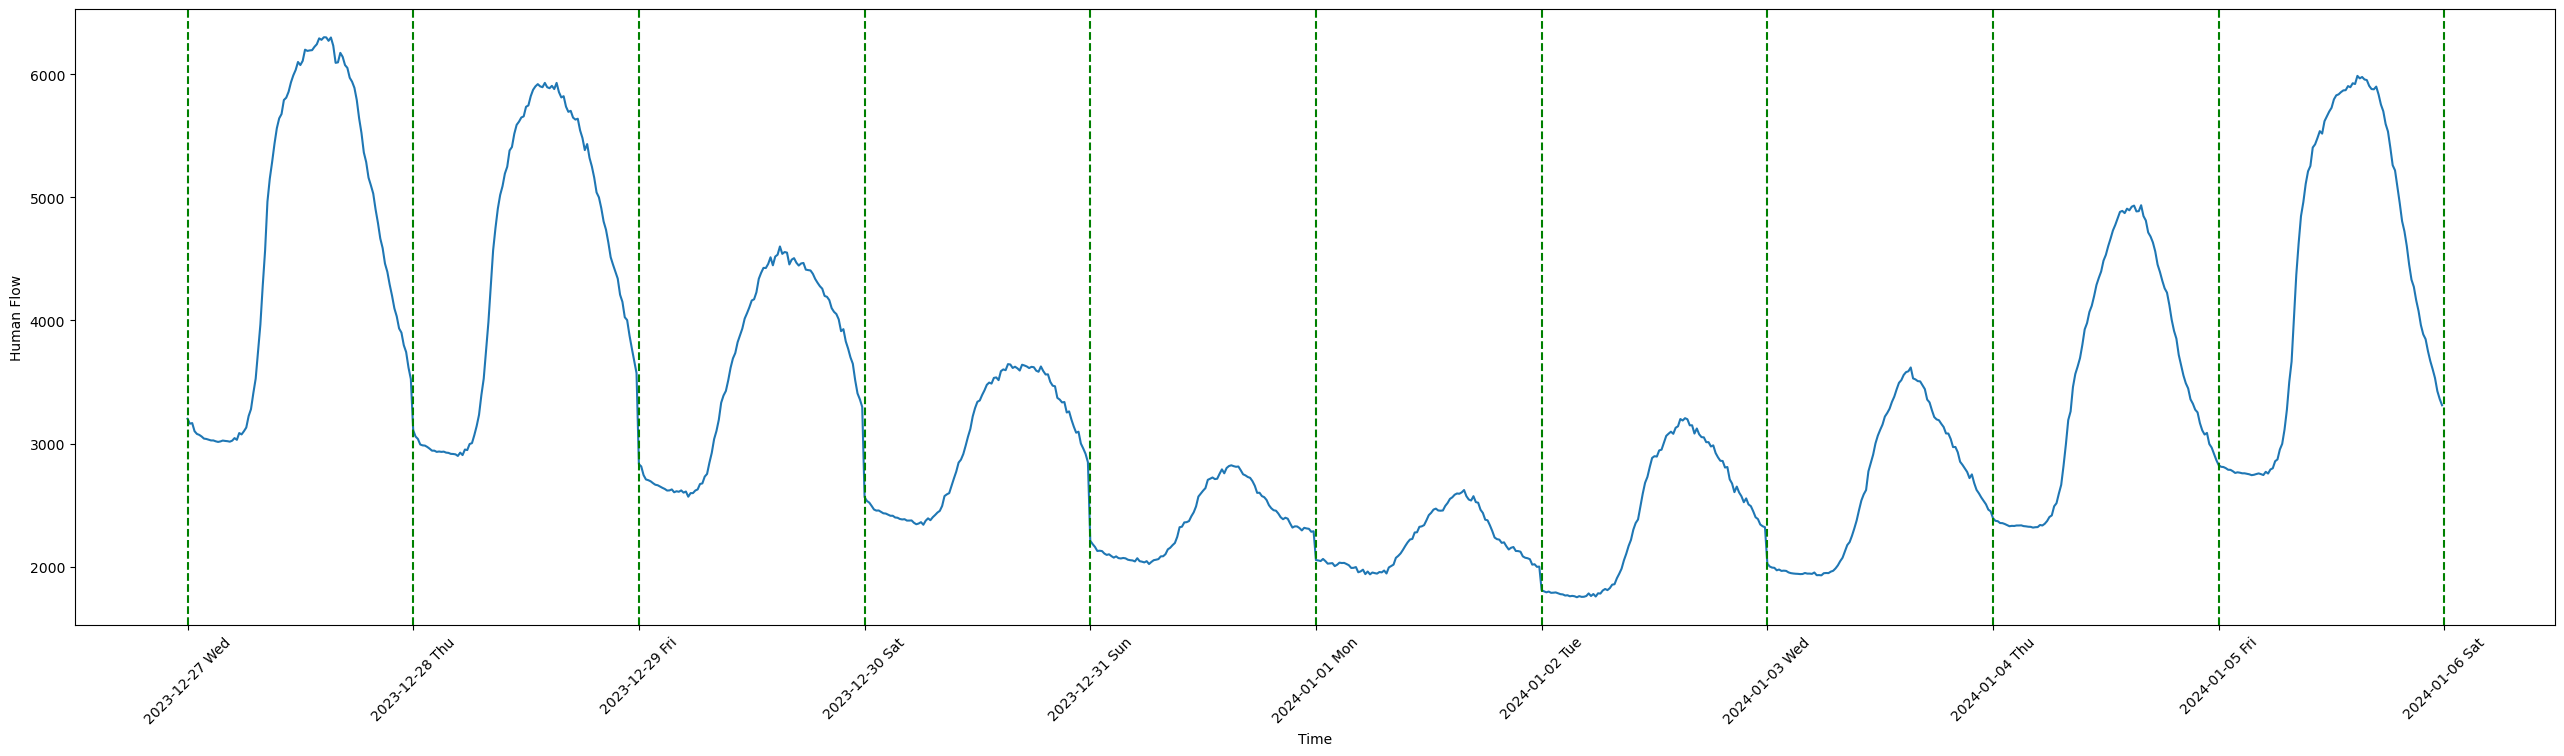

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
26184,2023-12-27 11:52:29,スポーツ,運Ｊ,日本,記事,3,東京都,内田、名古屋に完全移籍 Ｊリーグだより（１）,〇…Ｊ１名古屋は２７日、ＭＦ内田宅哉うちだ・たくや（２５）がＪ１のＦＣ東京から完全移籍すると...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 10, 0, 90, 0, 0, 0, 0, 0, 20]"
26151,2023-12-27 12:04:59,"スポーツ, 教育, 健康",運動,日本,記事,3,"福井県, 宮崎県, 秋田県, 大阪府, 大阪府東大阪市, 青森県, 東京都, 静岡県",高校ラグビーが開幕 第１０３回、５１チーム参加,第１０３回全国高校ラグビー大会は２７日、５１チームが参加して大阪府東大阪市の花園ラグビー場で...,"['18201', '18202', '18204', '18205', '18206', ...",217,"[0, 10, 30, 60, 0, 0, 0, 0, 0, 20]"
26155,2023-12-27 13:23:50,"スポーツ, 教育, 健康",運動,日本,記事,3,"福井県, 宮崎県, 大阪府, 大阪府東大阪市, 神奈川県, 福岡県, 東京都, 静岡県",目黒学院など２回戦へ 全国高校ラグビー開幕,第１０３回全国高校ラグビー大会は２７日、５１チームが参加して大阪府東大阪市の花園ラグビー場で...,"['18201', '18202', '18204', '18205', '18206', ...",324,"[0, 10, 0, 90, 0, 0, 0, 50, 0, 20]"
26190,2023-12-27 14:21:37,犯罪・司法,社会,日本,番外,2,"神奈川県横浜市, 東京都",番外４２ 警視庁の逮捕、検察の起訴をいずれも違法と判断,大川原化工機事件を巡る国家賠償訴訟の東京地裁判決は警視庁公安部による３人の逮捕や、検察の起訴...,"['14101', '14102', '14103', '14104', '14105', ...",81,"[0, 0, 10, 90, 0, 0, 0, 10, 0, 50]"
26191,2023-12-27 14:27:48,スポーツ,野球,日本,記事,3,東京都,ヤクルトが仕事納め 球界だより（１）,＊…ヤクルトは２７日、年内の業務を終えた。衣笠球団会長は東京都内の球団事務所で「来年はリーグ...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 10, 20, 70, 30, 0, 0, 10, 10, 0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
26287,2024-01-04 18:02:05,"気象, 環境",社会,日本,記事,3,"福島県, 石川県, 群馬県, 福島県福島市, 群馬県前橋市, 石川県金沢市, 福島県伊達市,...",２３年の平均気温、過去最高 平年より１・２９度上回る 高気圧、海面水温も影響,気象庁は４日、２０２３年の平均気温が、平年値（２０年までの３０年間平均）を１・２９度上回り、...,"['07201', '10201', '17201', '07213', '10203', ...",69,"[0, 20, 0, 80, 0, 30, 70, 10, 50, 90]"
26815,2024-01-04 18:17:57,"スポーツ, 環境",運動,日本,記事,3,"長野県, 山口県, 大分県, 秋田県, 東京都, 愛知県, 京都府, 大阪府, 岡山県, 静岡県",就実、高川学園など勝つ 全日本高校バレー開幕,バレーボールの第７６回全日本高校選手権は４日、東京体育館で開幕して１回戦が行われ、女子は一昨...,"['20201', '20202', '20203', '20204', '20205', ...",517,"[10, 0, 0, 90, 0, 0, 0, 0, 0, 10]"
26827,2024-01-04 19:59:43,"災害・事故, スポーツ, 教育",運動,日本,記事,3,"石川県, 富山県, 富山県富山市, 石川県金沢市, 愛知県, 愛知県名古屋市, 石川県七尾市...",石川代表が全力プレー 地震で被害、高校バレー,バレーボールの全日本高校選手権が４日、東京都渋谷区の東京体育館で開幕し、１日の能登半島地震で...,"['16201', '17201', '23101', '23102', '23103', ...",126,"[10, 0, 5, 80, 0, 0, 20, 30, 60, 50]"
26828,2024-01-04 20:11:39,"災害・事故, 教育, 気象",科学,日本,記事,3,"茨城県つくば市, 東京都, 石川県輪島市, 石川県羽咋郡志賀町, 石川県, 茨城県",石川で津波４・２㍍遡上 東大チーム、現地で確認,東京大地震研究所などのチームは４日、石川県志賀町の漁港で能登半島地震による津波が陸上を遡上そ...,"['08220', '13100', '13101', '13102', '13103', ...",66,"[10, 0, 0, 75, 20, 30, 80, 40, 60, 90]"


In [17]:
target_date = '2024-01-01 00:00:00'
window_range = 5
target_region = '東京都台東区'
vis(target_date, window_range, target_region)

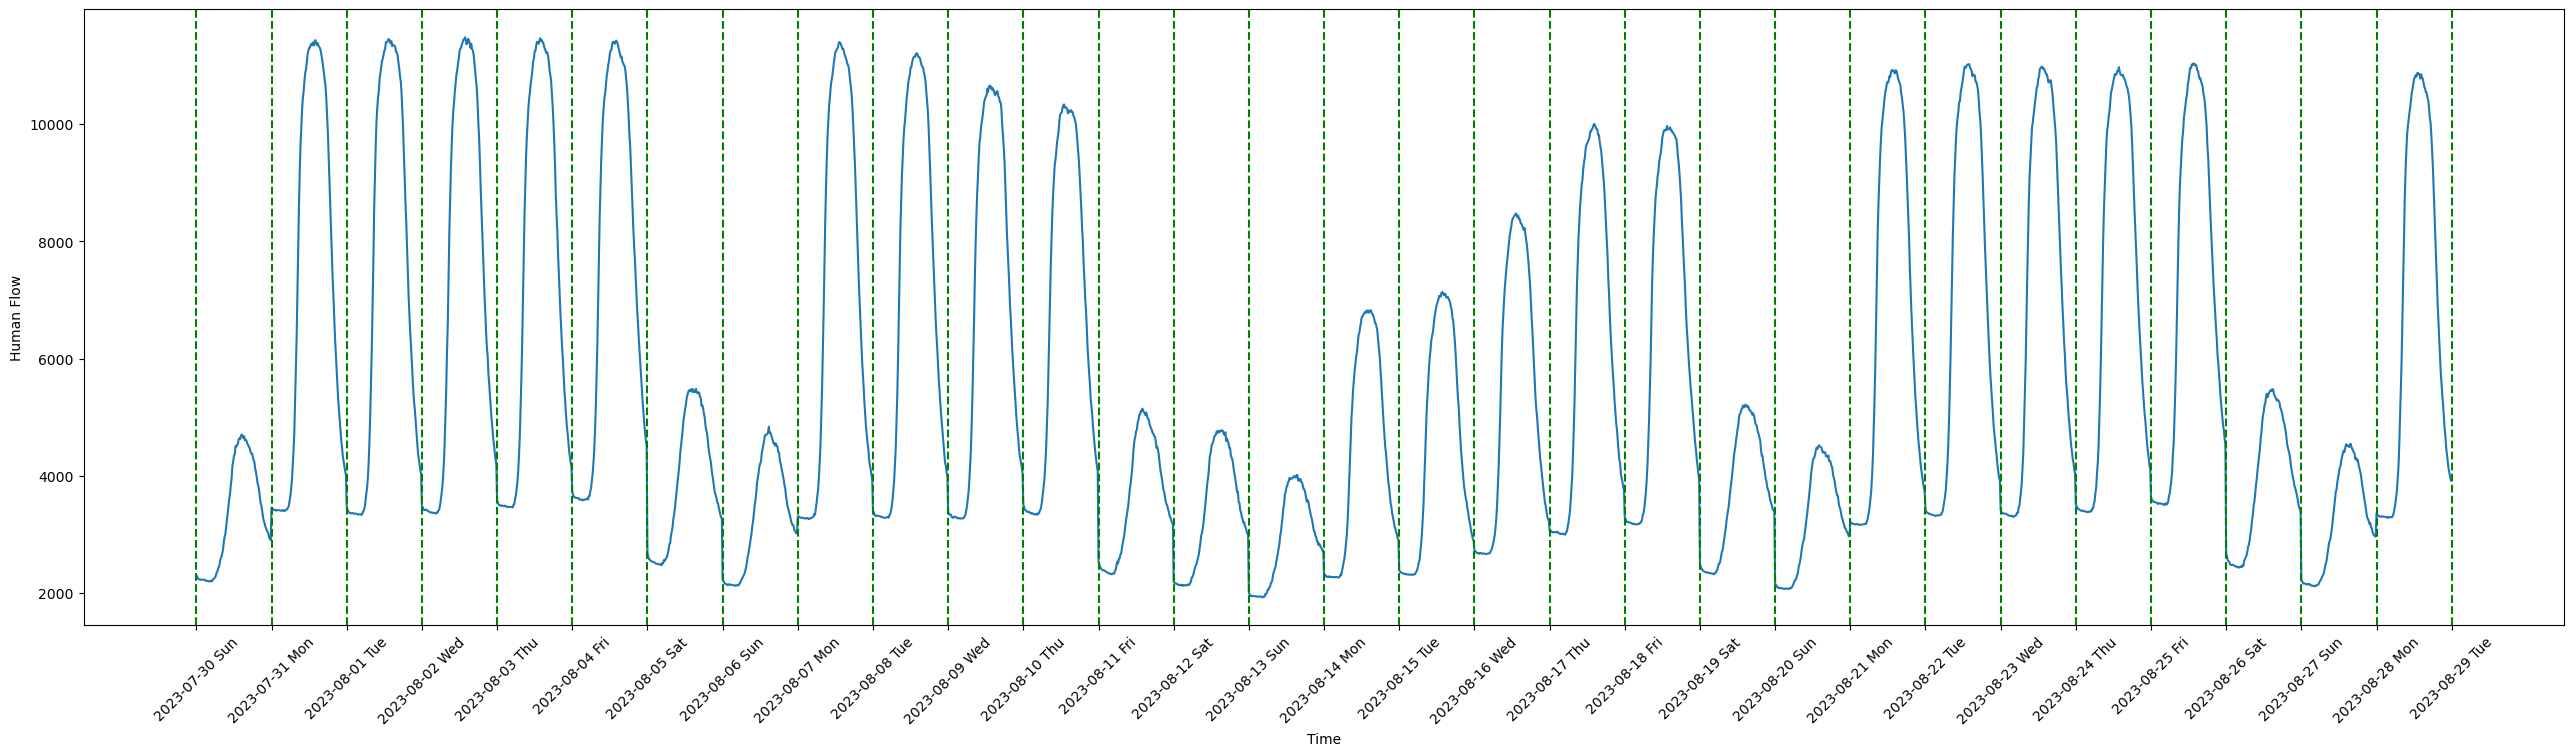

,DateAndTime,InBClass,InNewsGenre,InCountry,InNewsKind,InPriority,InJpnAreaName,InHeadLine,Content,codes,codesNum,scores
12731,2023-07-30 13:37:09,"スポーツ, 教育",高野,日本,記事,3,"大阪府, 大阪府大阪市, 兵庫県西宮市, 東京都, 兵庫県",履正社、共栄学園が代表 甲子園、４９代表校出そろう,第１０５回全国高校野球選手権大会の出場を懸けた地方大会は３０日、２大会で決勝が行われ、大阪は...,"['27102', '27103', '27104', '27106', '27107', ...",88,"[10, 0, 0, 90, 0, 0, 0, 0, 0, 10]"
12738,2023-07-30 16:19:29,"スポーツ, 教育",高野,日本,記事,3,"大阪府, 大阪府大阪市, 兵庫県西宮市, 東京都, 兵庫県",履正社、共栄学園が代表 甲子園、４９代表校出そろう,第１０５回全国高校野球選手権大会の出場を懸けた地方大会は３０日、２大会で決勝が行われ、大阪は...,"['27102', '27103', '27104', '27106', '27107', ...",88,"[5, 0, 10, 75, 20, 30, 40, 60, 50, 80]"
12757,2023-07-30 18:27:23,スポーツ,運動,日本,記事,3,"千葉県, 東京都",渡辺雄らが練習参加 バスケ男子直前合宿公開,日本など３カ国が８～９月に共催する男子ワールドカップ（Ｗ杯）に向けた日本代表候補の直前合宿が...,"['12101', '12102', '12103', '12104', '12105', ...",128,"[80, 10, 0, 90, 20, 30, 50, 5, 40, 70]"
12764,2023-07-30 19:33:38,スポーツ,運動,日本,記事,3,東京都,織田Ｖ、男子は根附制す 横浜アーバンフェス最終日,横浜アーバンスポーツフェスティバル最終日は３０日、横浜赤レンガ倉庫イベント広場で行われ、スケ...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 0, 10, 20, 30, 0, 0, 50, 80, 60]"
12769,2023-07-30 20:06:52,スポーツ,運動,日本,記事,3,"千葉県, 東京都",渡辺雄「この先が楽しみ」 バスケ男子直前合宿公開,日本など３カ国が８～９月に共催するバスケットボールの男子ワールドカップ（Ｗ杯）に向けた日本代...,"['12101', '12102', '12103', '12104', '12105', ...",128,"[0, 10, 70, 30, 20, 50, 30, 80, 90, 40]"
...,...,...,...,...,...,...,...,...,...,...,...,...
15209,2023-08-26 22:52:53,スポーツ,運動,日本,記事,3,東京都,バーバリアンズに山中ら ラグビー,日本ラグビー協会は２６日、各国・地域の選手を集めて編成されるバーバリアンズのメンバーとして、...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 0, 80, 10, 0, 0, 0, 0, 0, 40]"
15210,2023-08-26 22:54:47,スポーツ,運Ｊ,日本,記事,3,東京都,２度のリード生かせず ＦＣ東京―神戸から（２）完,〇…ＦＣ東京は２度のリードを生かせなかった。前半１８分にディエゴオリベイラが先制。１―１の後...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 10, 30, 40, 0, 5, 0, 0, 0, 20]"
15213,2023-08-26 22:57:46,スポーツ,運Ｊ,日本,記事,3,東京都,ピッチサイド（５） ＦＣ東京―神戸談話,▽ＦＣ東京―神戸神戸・大迫（３試合連続ゴール）「最初の失点は反省しないといけないが、諦めない...,"['13100', '13101', '13102', '13103', '13104', ...",63,"[0, 20, 80, 10, 5, 5, 0, 0, 0, 50]"
15234,2023-08-27 17:37:15,"スポーツ, 健康",相撲,日本,記事,3,"鳥取県, 鳥取県鳥取市, 東京都",師匠が伯桜鵬の現状説明 将来の左肩手術も選択肢,大相撲の宮城野親方（元横綱白鵬）は２７日、左肩関節亜脱臼との診断で夏巡業を全休した幕内伯桜鵬...,"['31201', '13100', '13101', '13102', '13103', ...",64,"[0, 30, 20, 50, 0, 0, 0, 0, 10, 80]"


In [18]:
target_date = '2023-08-14 00:00:00'
window_range = 15
target_region = '東京都中央区'
vis(target_date, window_range, target_region)